# III Neuroniniai tinklai

## Temos

<code>**1  : Kodėl jiem mums reikalingi**</code><br>
<code>**2  : Neuroninio tinklo modeliai, istorija**</code><br>
<code>**3  : Neuronas kaip loginis operatorius**</code><br>


Tai gana sena idėja ir šiandien tai yra naujausia technika, skirta daugeliui įvairių mašininio mokymosi problemų. Mes jau turime tiesinę ir logistinę regresiją, todėl natūraliai galite pagalvoti, kam gy reikalingi neuroniniai tinklai. Norėdami tai suprasti, turime pažvelgti į sudėtingą netiesinę hipotezę. Ankstesnėse paskaitose mes aprarinėjome tiesines hipotezes, tokias kaip <code>**tiesinė regresija, daugiamatė tiesinė regresija ir logistinė regresija**</code>. Tai naudingi algoritmai gebantis spręsti daugeli problemų, tačiau vis tiek jų galios nepakanka, kad išspręstų sunkias problemas. Netiesinės klasifikacijos problemos yra viena iš tų, kurių negalima lengvai išspręsti naudojant vien tiesinius metodus.

<code>**Tiesinis logistinės regresijos modelis**</code>

\begin{multline*}
h_{\theta}(x) = g(\theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + \theta_{3}x_{3} +  + \theta_{n}x_{n})
\end{multline*}


Jei turime tokį štai duomenų rinkinį:

In [55]:
import warnings
warnings.filterwarnings('ignore')

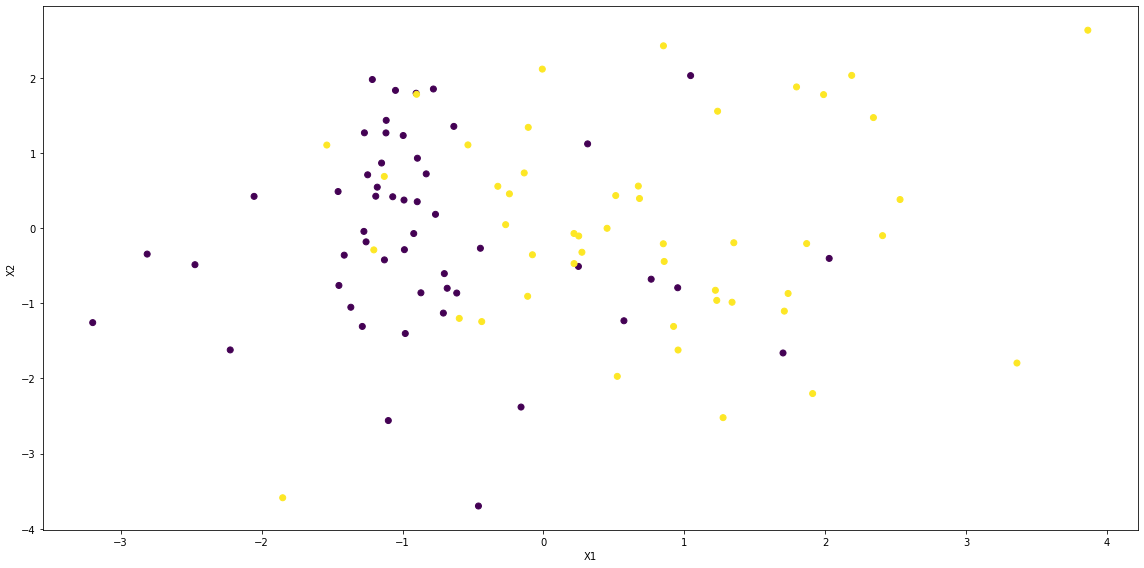

In [48]:
%run ../scripts/_nn_I_load_data.py

ir norime pritaikyti logistinę regresiją šiam uždaviniui spręsti, ką galėtume padaryti tai pritaikyti logistinę regresiją su daugybę <code>**netiesinių savybių (polinomų)**</code>

<code>**Ne tiesinis logistinės regresijos modelis**</code>

\begin{multline*}
h_{\theta}(x) = g(\theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + \theta_{3}x_{1}x_{2} + \theta_{4}x_{1}^2x_{2} + \theta_{5}x_{1}^{3}x_{2} + \theta_{6}x_{1}x_{2}^{2} + \ ...)
\end{multline*}

Jei įtrauksime daug polinomų terminų, tokių kaip aukščiau, ir jei to pakanka, galbūt galime gauti hipotezę, kuri tuos pavyzdžius atskirtų nuo skirtingų klasių. Ir šis metodas veiks gerai, kai turime <code>**dvi savybės x1, x2**</code>, tada galime įtraukti visus tuos x1, x2 daugianario (polinomo) terminus. Tačiau daugeliui mašininio mokymosi problemų bus daug daugiau savybių nei dvi.<br>

Netiesinė forma yra sudėtingesnė, nes joje yra daug daugianario terminų. Tačiau kai funkcijų skaičius yra didelis, aukščiau pateiktas sprendimas nėra geras pasirinkimas norint išmokti sudėtingos netiesinės hipotezės. Isivaizduokite jei yra <code>**100 savybių**</code> ir jei įtrauktume visus šių savybių kvadratinius terminus, jų būtų labai daug ir tai tik tų kurie yra antros eilės daugianario terminai.

\begin{multline*}
x_{1}^{2}, x_{1}x_{2}, x_{1}x_{3}, x_{1}x_{4}, \ ... \ , x_{1}x_{100}
\end{multline*}

\begin{multline*}
x_{2}^{2}, x_{2}x_{3}, x_{2}x_{4}, x_{2}x_{5}, \ ... \ , x_{2}x_{100}
\end{multline*}

Ir jei įtrauksime tik antros eilės terminus, tai yra terminai, kurie yra dviejų terminų sandauga. Tada tuo atveju, kai <code>**n = 100**</code>, gauname apie ≈ 5000 savybių. Kvadratinių ypatybių skaičius apytiksliai didėja tokia tvarka <code>**O(n²)**</code>, šiuo konkrečiu atveju, arčiau <code>**≈ n² / 2**</code>.<br>

Visų kvadratinių savybių įtraukimas neatrodo racionalus kelias, tai bus savybių/funkcijų ir mes galime per daug pritaikyti modelį prie duomenų rinkinio, o dar svarbiau, kad tai gali būti labai brangus <code>**skaičiavimai**</code>. su tiek daug savybių/funkcijų.<br>

Vienas dalykas ką dar galėtume padaryti, tai įtraukti tik šių kai kurių poaibį, galbūt tik su originaliomis savybėmis:

\begin{multline*}
x_{1}^{2}, x_{2}^{2}, x_{3}^{2} \ ... \ , x_{100}^{2}
\end{multline*}

Tada savybių/funkcijų skaičius bus daug mažesnis. Tačiau tai nėra pakankamai savybių ir ta tikrai <code>**neleis mums pritaikyti modelį prie sudėtingų duomenų rinkinio**</code>. Jei įtrauksime tik šias kvadratinias išraiškas kartu su pradinėmis išraiškomis, panašu kad mūsų hipotezę bus elipsė.

5000 savybių atrodo daug, jei įtrauktume kiekvienos ypatybės kubinius (trečios eilės polinomus).
\begin{multline*}
x_{1}x_{2}x_{3}, x_{1}^{2}x_{2}, x_{10}x_{11}x_{13} \ ...
\end{multline*}

Šių savybių bus daug, jos apytiksliai didėja tokia tvarka <code>**O(n³)**</code>, todėl jei n = 100 galime apskaičiuoti, kad gausime <code>**≈ 200 000**</code> tokių kubinių savybių. Įtraukus šias aukštesnės eilės daugianario ypatybes, kai mūsų pradinis savyvių rinkinys yra ir taip didelis, tai tikrai dramatiškai išplės savybių erdvę. <code>**Tai nėra geras būdas kuriant netiesinius klasifikatorius, kai n yra didelis**</code>

Daugeliui mašininio mokymosi problemų n bus gana didelis. Tarkime kompiuterinio matymo problemos.
Jeigu norime naudoti mašininį mokymąsi, kad išmokytume klasifikatorių ištirti vaizdą ir pasakyti, ar vaizde yra žmogaus, ar ne. Daugelis žmonių šiaip jau stebisi, kodėl kompiuterinė rega tokia sudėtinga ir ne visai tiksli. Turiu galvoje, kai visi žiūrime į šią nuotrauką, taip akivaizdu, kas tai yra. Taigi, kaip mokymosi algoritmas gali nesuprasti kas čia yra šioje nuotraukoje.

dtype of matrix members: uint8
shape of matrix:(551, 920, 3)


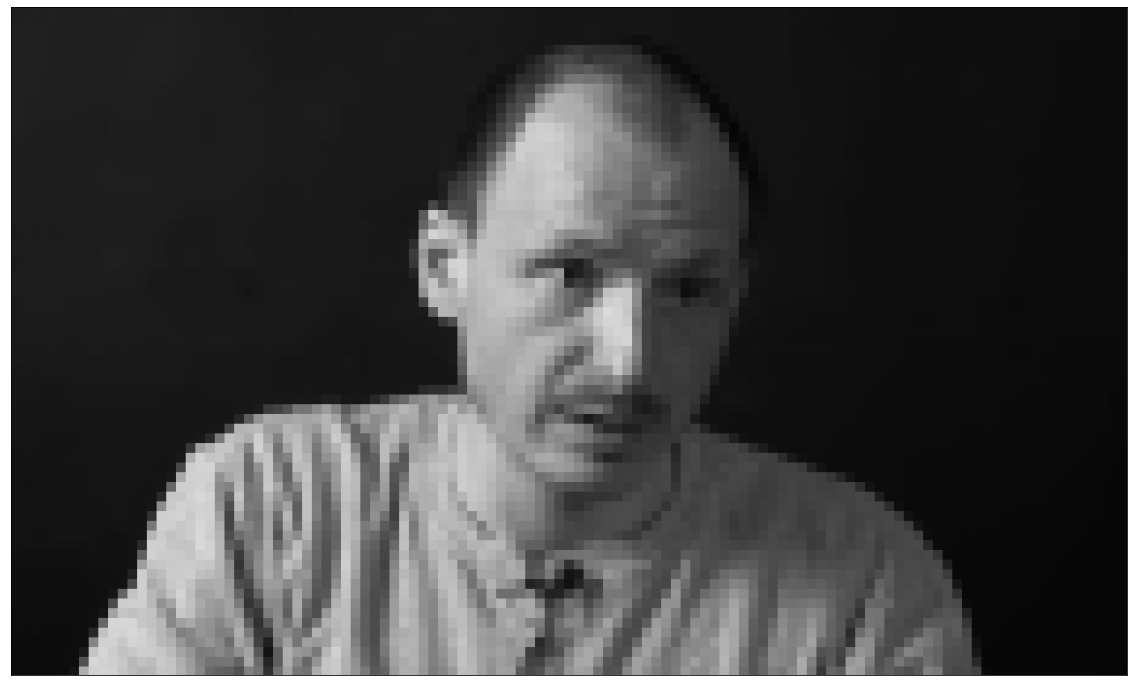

In [94]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.image as img

img = img.imread('img/i_as_a_sample.jpg')

print(f'dtype of matrix members: {img.dtype}')
print(f'shape of matrix:{img.shape}')

plt.figure(figsize=(20,20))
plt.imshow(img)
plt.xticks([])
plt.yticks([]);

Norėdami suprasti problema, kad turime priartinti nedidelę vaizdo dalį, pavyzdžiui, sritį. Tarkime, kur jūs ir aš matome veidą, kompiuteris mato matricą arba pikselių intensyvumo verčių tinklelį, nurodantį kiekvieno vaizdo pikselio ryškumą. Problema pažvelgus į šią pikselių intensyvumo verčių matricą reikia pasakyti kad šie skaičiai reiškia žmogaus akį.

In [102]:
np.set_printoptions(threshold=np.inf)
img[25:35, 50:55, 1]

array([[30, 30, 30, 30, 30],
       [30, 30, 30, 30, 30],
       [30, 30, 30, 30, 30],
       [30, 30, 30, 30, 30],
       [30, 30, 30, 30, 30],
       [30, 30, 30, 30, 30],
       [30, 30, 30, 30, 30],
       [31, 31, 31, 31, 31],
       [31, 31, 31, 31, 31],
       [31, 31, 31, 31, 31]], dtype=uint8)

<div class="alert alert-block alert-success">

<h2>Klasės pratimas </h2>
    
Ar čia žmogaus akis: ?
 
\begin{multline*}
\begin{bmatrix}
30 & 30 &  30&  30 &  30 \\
30 & 30 &  30&  30 &  30 \\
30 & 30 &  30&  30 &  30 \\
30 & 30 &  30&  30 &  30 \\
30 & 30 &  30&  30 &  30 \\
30 & 30 &  30&  30 &  30 \\
30 & 30 &  30&  30 &  30 \\
31 & 31 &  31&  31 &  31 \\
31 & 31 &  31&  31 &  31 \\
31 & 31 &  31&  31 &  31 \\
\end{bmatrix}
\end{multline*}
</div>

Kad suprastume, kodėl mums reikia <code>**netiesinės hipotezės**</code>, pažvelkime į kai kuriuos žmogaus veido vaizdus ir ne veidus, kuriuos galėtume įtraukti į duomenų rinkini mokymosi algoritmui. Pažymėkime kai kurias taškų vietas vaizde ir  šie taškai turi tam tikrą intensyvumo reiškmę. Tą patį padarykime su kitais žmogaus veido atvaizdo pavyzdžiais. Kai turime daug duomenų pavyzdžių (žmonių ir ne žmonių veidų), galų gale gauname, kad ne žmonių veidų tie taškai  turi galbūti skirtingą intesvumą todėl patys taškai bus skirtinguose savybių erdvės regionuose. Ir čia mums reikia tam tikros netiesinės hipotezės, kad pabandytume atskirti šias dvi klases.

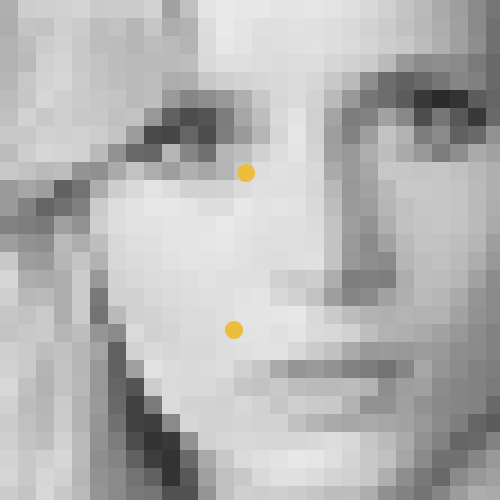

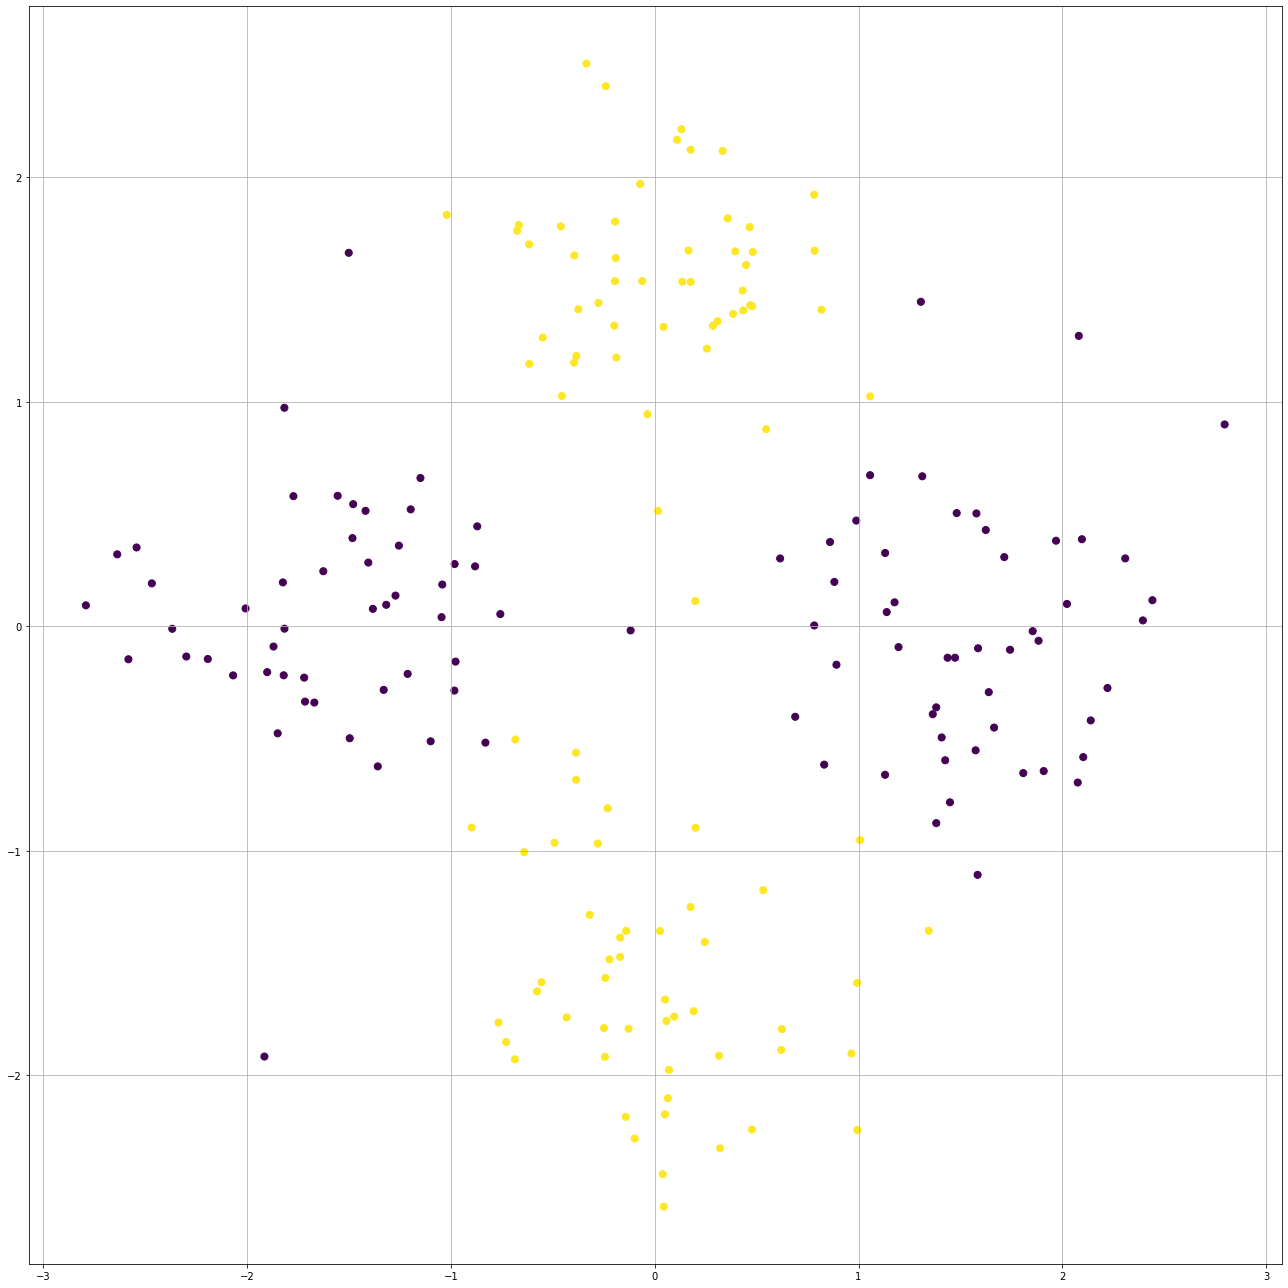

In [50]:
%run ../scripts/_nn_II_load_data.py

<code>**Koks yra savybių erdvės matmuo?**</code>. Tarkime, kad naudotume tik <code>**50 x 50**</code> pikselių mažus vaizdus. Taigi turėtume 2500 pikselių, taigi mūsų <code>**n = 2500**</code>, jei RGB spalvų erdvėje, tada nx3 <code>**n = 7500**</code>.
Mūsų savybių vektorius x yra visų pikselių ryškumo verčių nuo 0 iki 255 sąrašas. <br>

Taigi, jei kursime netiesinę hipotezę įtraukdami visas kvadratinės išraiškas, tai yra visi formos <code>**(𝑥𝑖 * 𝑥𝑗) ≈ 3 mln. savybių**</code>. Ir tai tiesiog per yra per daug kad galėtume efektyviai tai panduooti. Mūsų skaičiavimai būtų labai brangus sukurti ir apdoroti visas šias <code>**3 mln. savybių viename duomenų pavyzdyje**</code>.

<div class="alert alert-block alert-success">

<h2>Klasės pratybos</h2>

Tarkime kuriate algoritmą atpažinti automobilius ir turi 100 pavyzdžių, 100x100 pikselių paveiksliukų (greyscale spektre, ne RGB). Savybės turi būti pikselių intensyvumo reikšmės. Jei apmokysite logistinę regresiją, ir  savybės įtrauksite visus kvadratinius terminus <code>**(𝑥𝑖 * 𝑥𝑗)**</code>, kiek savybių turėsite?
    
 * <code>**5000**</code>
 * <code>**100 000**</code>
 * <code>**5 million**</code>
 * <code>**10 billion**</code>
</div>

\begin{multline*}
X \in \mathbf{R}^{m \times n}
\end{multline*}

In [114]:
one_sample_feature_space = 100*100

In [116]:
one_sample_feature_space

10000

In [115]:
quadratic_terms = one_sample_feature_space**2
quadratic_terms

100000000

In [117]:
all = quadratic_terms * 100

In [118]:
all

10000000000

In [ ]:
10 000 000 000

Paprasta logistinė regresija pridedant galbūt kvadratinius arba kubinius savybių terminus, tai tiesiog nėra geras būdas algoritmui išmokti sudėtingas netiesinės hipotezes, kai n yra labai didelis. Mes paprasčiausiai turime per daug savybių šiam algoritmui. Taigi <code>**Neuroniniai tinklai**</code> yra daug geresnis būdas išmokti sudėtingų netiesinių hipotezių, net jei n yra be galo didelis.

## Neuroninio tinklo modeliai

Šie modeliai buvo sukurti kaip imituojantys neuronų tinklus smegenyse. Drbtinis neuronas, vadinamas <code>**Perceptronas**</code> buvo sukūrtas šeštajame ir septintajame dešimtmečiuose mokslininko [Frank Rosenblatt](https://en.wikipedia.org/wiki/Frank_Rosenblatt), įkvėptas ankstesnių darbų kuriuos atliko [Warren McCulloch](https://en.wikipedia.org/wiki/Warren_Sturgis_McCulloch) ir [Walter Pitts.](https://en.wikipedia.org/wiki/Walter_Pitts)
Supaprastintame lygmenyje neuronas yra skaičiavimo vienetas, kuris per savo įvesties laidus gauna daugybę įvesčių ir atlieka tam tikrus skaičiavimus, o tada siunčia išvestis per savo aksoną į kitus mazgus arba kitus smegenų neuronus. Neuroninės ląstelės bendrauja mažais elektriniais ir cheminiais impulsais.

Ar mūsų smegenys veikia taip, kaip giliojo mokymosi modeliai? Neįmanoma visiškai tiksliai atsakyti, nes žmonės nežino, kaip tiksliai veikia smegenys. Vis dar daugelis dalykų nėra aiškūs. Tačiau galiu drąsiai teigti, kad mūsų smegenys yra labai sudėtingos ir nors gilusis mokymasis puikiai atlieka tam tikras užduotis, pavyzdžiui, objekto aptikimą, tačiau žmogaus smegenys gali daug daugiau. Mes negalime kol kas atkurti skaitmenoje savo smegenis, kitaip jau turėtume AGI (dirbtinį bendrąjį intelektą). Mūsų smegenys tikėtina gali būti kad naudoją kažkoį algoritmą, pavyzdžiui, atgalinį propagavimą tarp daugelio kitų.

<video controls src="video/cortex.mp4" width="600" height="400" />

[Neuronu skaičius](https://en.wikipedia.org/wiki/List_of_animals_by_number_of_neurons) turi tam tikrą poveikį intelektui. Žvelgdami į šią lentelę galime manyti, kad <code>**Banginis žudikas**</code> yra protingiausias padaras. Žmonės turi 16 milijardų neuronų, o šie banginiai – 43. Taigi ar tik dėl šios savybės esame kažkaip esame protingesni už banginius? Turiu pagrindo manyti, kad intelektas priklauso ne tik nuo neuronų skaičiaus. Beje, yra keletas <code>**natūralios kalbos apdorojimo modelių, kuriuose yra 175 milijardai parametrų (mazgų)**</code>. Taigi ta prasme šie modeliai yra net didesni už žmogaus smegenis, jei parametrus (mazgus) laikysime neuronais. Šie modeliai turi daugiau skaičiavimo pajėgumų nei žmogaus smegenys, tačiau kalba jie ne taip gerai kaip žmonės. Tačiau jie puikiai įsimena informaciją, o mes ne taip gerai įsimename, bet <code>**labai efektyviai ją suprantame.**</code>

### Biologinis neuronas

Šioje paskaitoje kalbėsime apie vieno sluoksnio neuroninius tinklus ir jų taikymą, o vėliau kitoje paskaitoje apžvelgsime daugiasluoksnius tinklus su daugybe parametrų. Taigi, pradėkime nuo neuronų modelio, biologinio neurono skaičiavimo modelio.

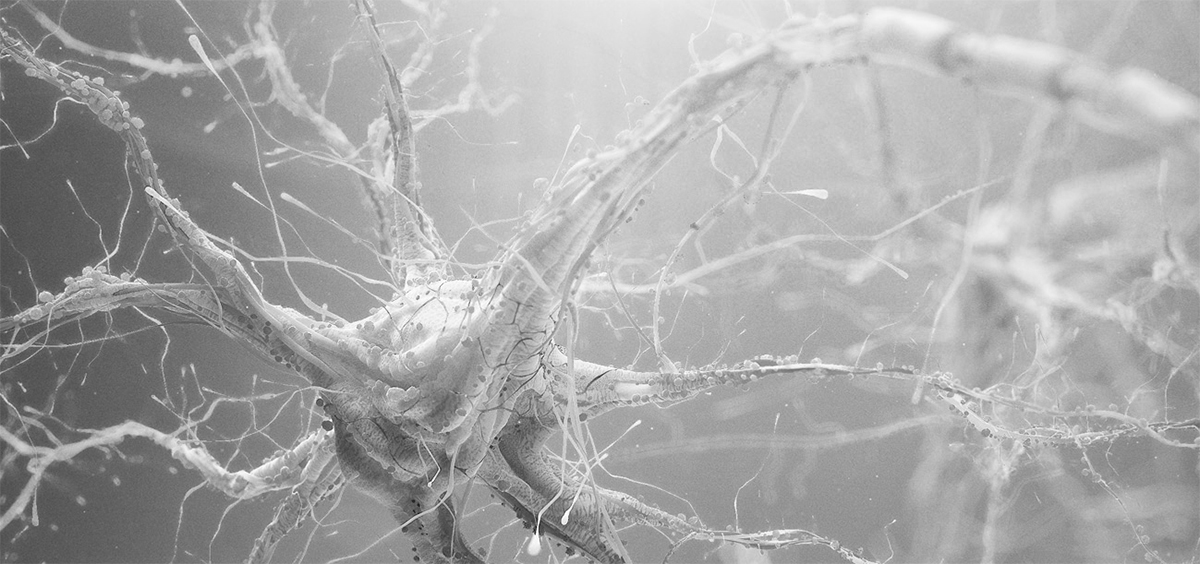

Ankstyviausią matematinį neuronų modelį sukūrė [McCulloch and Pitt in paper about](https://home.csulb.edu/~cwallis/artificialn/History.htm) <code>**Logical calculus of the ideas immanent in nervous activity**</code> 1943

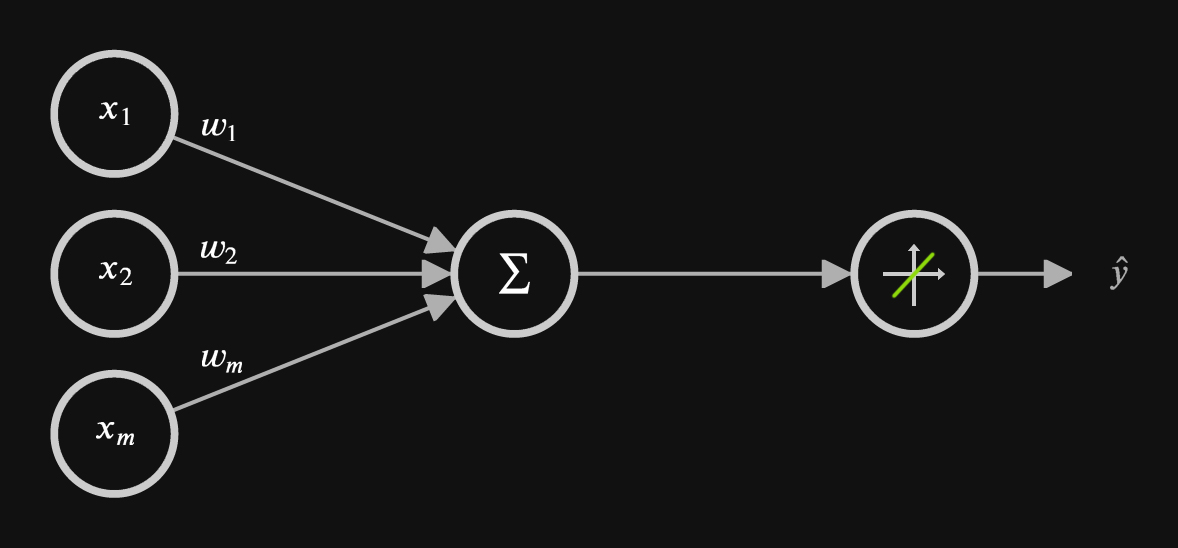

\begin{multline*}
x = 
\begin{bmatrix}
x_1 \\
x_2 \\
x_m
\end{bmatrix},
\
w = 
\begin{bmatrix}
w_{1} \\
w_{2} \\
w_{m}
\end{bmatrix}
\end{multline*}

\begin{multline*}
h_{w}(x^) = w{0}x_{0} + w_{1}x_{1} + w_{2}x_{2} + ... + w_{n}x_{n} = w^{\top} x^{i}
\end{multline*}

\begin{multline*}
h_{w}(x) = w^{\top}x 
\end{multline*}


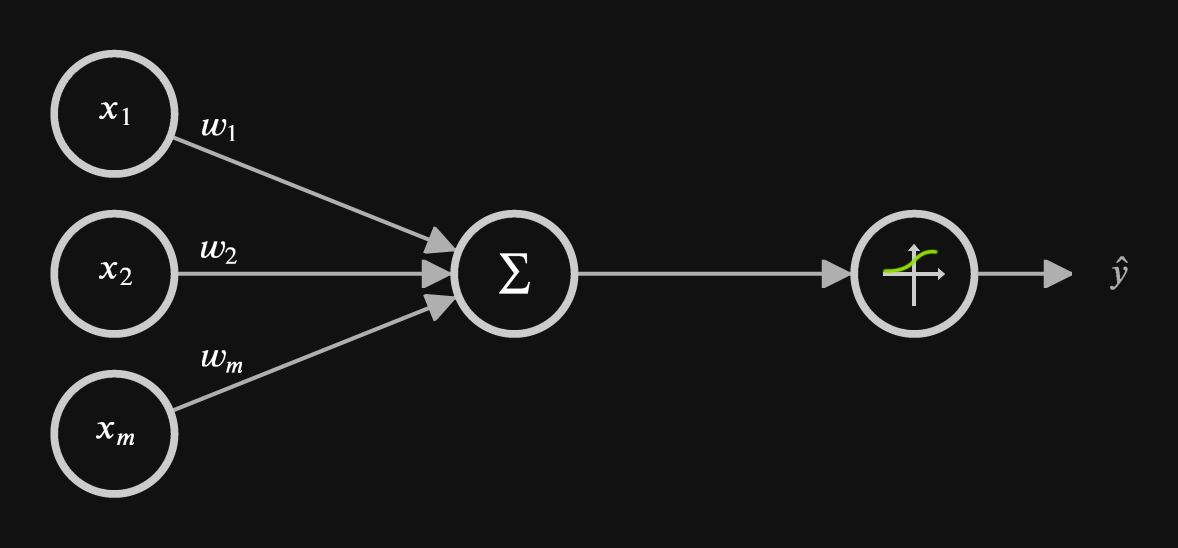

X yra mūsų įvestis , mes turime tam tikrus svorius/parametrus (w), turime grynosios įvesties funkciją kaip branduolį, kur signalas integruojamas į <code>**svertinę sumą**</code>, kur įvestis padauginama iš svorių ir sudedama į bendrą reikšmę. DL mes tai vadiname <code>**pre-aktyvacija**</code> ir žymime raide <code>**z**</code>. Tada ši reikšmė perduodama slenksčio funkcijai ir, jei reikšmė pasiekia tam tikrą slenkstį, perduodamas atitinkamas signalas.

\begin{multline*}
x = 
\begin{bmatrix}
x_1 \\
x_2 \\
x_m
\end{bmatrix},
\
w = 
\begin{bmatrix}
w_{1} \\
w_{2} \\
w_{m}
\end{bmatrix}
\end{multline*}

\begin{multline*}
z = w^{\top}x
\end{multline*}

\begin{multline*}
h_{w}(x) = g(z) = \dfrac{1}{1+e^{-z}} 
\end{multline*}

\begin{multline*}
\hat{y} \in (0,1)
\end{multline*} 

## Neuronas kaip loginis operatorius

Peceptronai (neuronai) yra taikomi kaip <code>**loginių operatorių funkcijos**</code> , dažniausiai iš jų yra <code>**AND**</code>, <code>**OR** </code> ir <code>**NOT**</code> operatoriai. Vėliau pamatysime, ką daryti su sunkiai suprantamu operatoriumi <code>**XOR**</code>. Pagalvokite apie <code>**x1 ir x2**</code> kaip įvestis ir <code>**y**</code> kaip išvestį.

### AND loginis vienetas

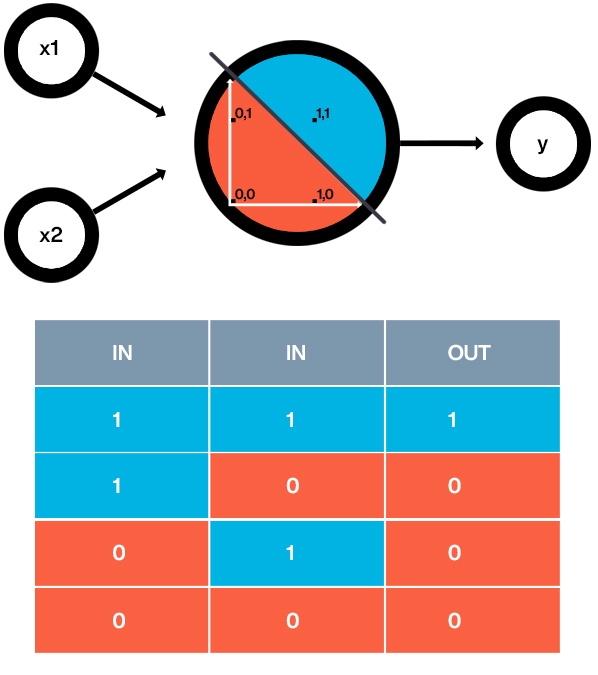

### OR loginis vienetas

OR perceptronas yra labai panašus į AND perceptroną. Žemiau esančiame paveikslėlyje OR perceptronas turi tą pačią sprendimo liniją kaip ir IR perceptronas, išskyrus tai, kad linija yra paslinkta žemyn.

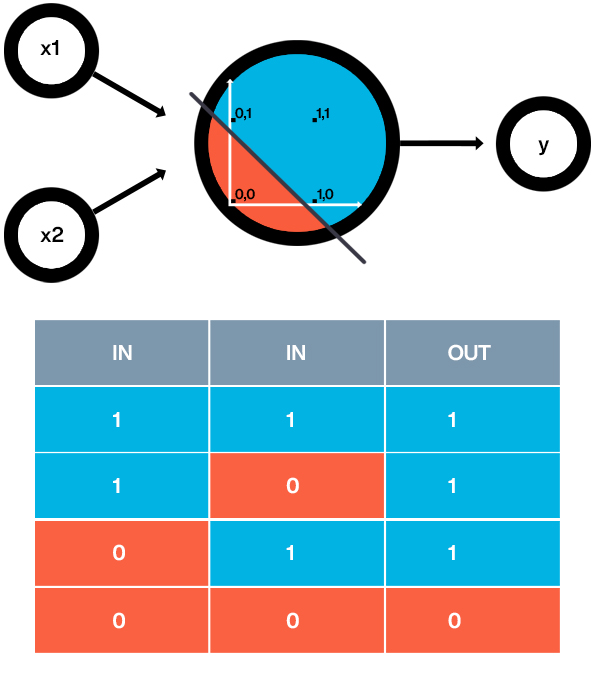

<div class="alert alert-block alert-success">
<h2>Klasės pratybos</h2>
Kokie yra AND perceptrono svoriai ir poslinkis? (svoris , w -  θ1, poslinkis , b - θ0)
    
Nustatykite <code>**svorius w1, w2 ir poslinkį b**</code> į vertes, kurios teisingai atliks operaciją AND, kaip parodyta aukščiau. 
</div>

In [456]:
import pandas as pd

# TODO: Set weight1, weight2, and bias
w1 = 0
w2 = 1
b  = 0

test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [False, False, False, True]
outputs = []

for test_input, correct_output in zip(test_inputs, correct_outputs):
    linear_combination = w1 * test_input[0] + w2 * test_input[1] + b
    output = int(linear_combination >= 0)
    is_correct_string = 'Yes' if output == correct_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])


num_wrong = len([output[4] for output in outputs if output[4] == 'No'])
output_frame = pd.DataFrame(outputs, columns=['Įvesties x1 reikšmė', '  Įvesties x2 reikšmę', '  Tiesinė kombinacija', '  Aktivacijos išvestis', '  Ar teisingai'])
if not num_wrong:
    print('Puiku!  Visi parametrai nustatyti teisingai.\n')
else:
    print(f'Yra {num_wrong} klaidos !\n')
print(output_frame.to_string(index=False))

Yra 3 klaidos !

 Įvesties x1 reikšmė    Įvesties x2 reikšmę    Tiesinė kombinacija    Aktivacijos išvestis   Ar teisingai
                   0                      0                      0                       1             No
                   0                      1                      0                       1             No
                   1                      0                      0                       1             No
                   1                      1                      0                       1            Yes


<div class="alert alert-block alert-success">
<h2>Klasės pratimas</h2>
Kokie yra du būdai, kaip pakeisti AND perceptroną į OR perceptroną?  <br> 
    
 -<code>**Padinti visus svorius**</code><br> 
 -<code>**Sumažinti visus svorius**</code><br> 
 -<code>**Padidinti vieną svorį**</code><br> 
 -<code>**Sumažinti vieną svorį**</code><br> 
 -<code>**Padidinti poslinkį**</code><br> 
 -<code>**Sumažinti poslinkį**</code>   
</div>

### NOT loginis vienetas

Skirtingai nuo kitų perceptronų, kuriuos aptarėme, operacijai NOT rūpi tik viena įvestis. Operacija grąžina `0`, jei įvestis yra `1`, ir `1`, jei įvestis yra '0'. Kiti įėjimai į perceptroną nepaisomi.

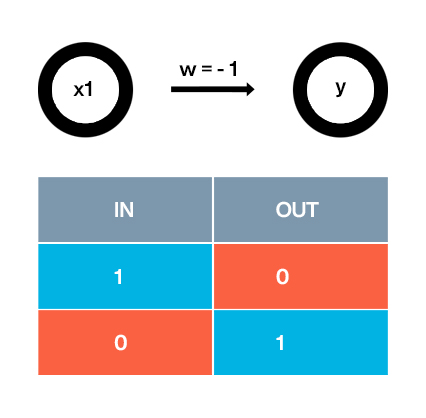

In [454]:
import pandas as pd
# TODO: Set weight1, weight2, and bias
w1 = 1
w2 = 1
b  = -1

test_inputs = [(0, 0), (0, 1), (1, 0), (1, 1)]
correct_outputs = [True, False, True, False]
outputs = []

# Generate and check output
for test_input, correct_output in zip(test_inputs, correct_outputs):
    linear_combination = w1 * test_input[0] + w2 * test_input[1] + b
    output = int(linear_combination >= 0)
    is_correct_string = 'Yes' if output == correct_output else 'No'
    outputs.append([test_input[0], test_input[1], linear_combination, output, is_correct_string])

# Print output
num_wrong = len([output[4] for output in outputs if output[4] == 'No'])
output_frame = pd.DataFrame(outputs, columns=['Įvestoes x1 reikšmė', '  Įvesties x2 reikšmė', '  Tiesinė kombinacija', '  Aktivacijos išvestis', '  Is Correct'])
if not num_wrong:
    print('Puiku!  Visi parametrai nustatyti teisingai.\n')
else:
    print(f'Yra {num_wrong} klaidos !\n')
print(output_frame.to_string(index=False))

Yra 3 klaidos !

 Įvestoes x1 reikšmė    Įvesties x2 reikšmė    Tiesinė kombinacija    Aktivacijos išvestis   Is Correct
                   0                      0                     -1                       0           No
                   0                      1                      0                       1           No
                   1                      0                      0                       1          Yes
                   1                      1                      1                       1           No


### XOR neuronas

Atsakymas, kodėl šiais laikais turime DL ir neapstojome su perceptronais ir adaline, yra tas, kad jie gali išmokti tik labai paprastas sprendimų ribas, vadinamąsias dvejetaines sprendimų ribas. Kai turime <code>**XOR**</code> išskirtinę OR problemą. Tai gali atrodyti kaip paveikslėlis žemiau. Duomenų taškai atrodo taip, lyg jie būtų išdėstyti X formoje. Dvejetainis klasifikatorius šios problemos išspręsti negalėtų. Tiesiog pabandykite nubrėžti linijinę kaip sprendimo ribą. Ir jūs sužinosite, kad nėra jokio būdo, kaip galėtume teisingai klasifikuoti šiuos taškus naudodami dvejetainį klasifikatorių. Šis apribojimas iš tikrųjų pradėjo pirmąją taip vadinamąją `AI žiemą` ir žmonės prarado susidomėjo neuroninių tinklų tyrimais. 

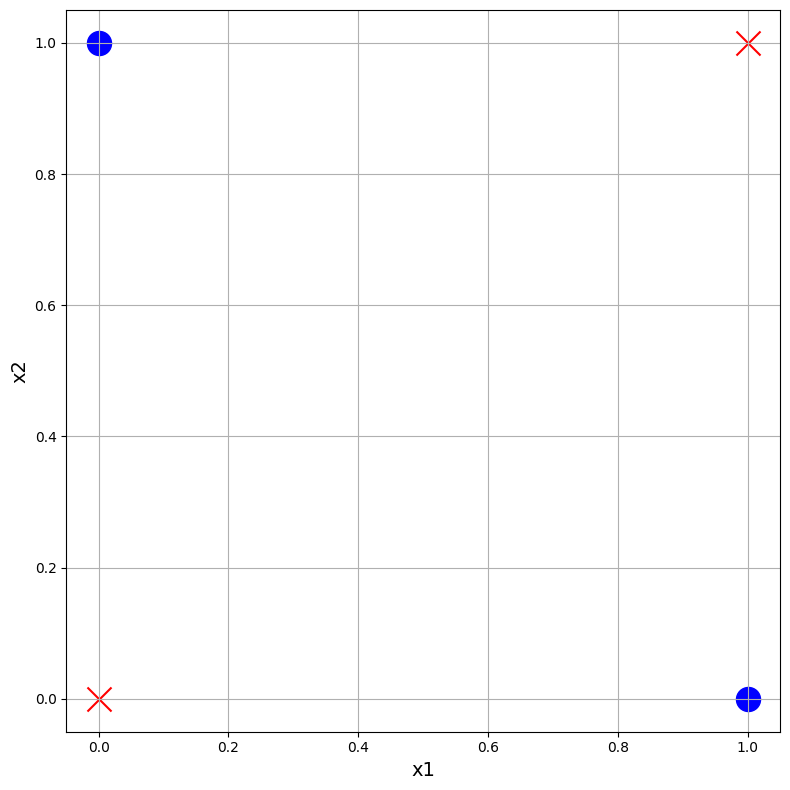

In [476]:
%run ../scripts/_nn_III_load_data.py


In [93]:
# x1, x2
points = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])

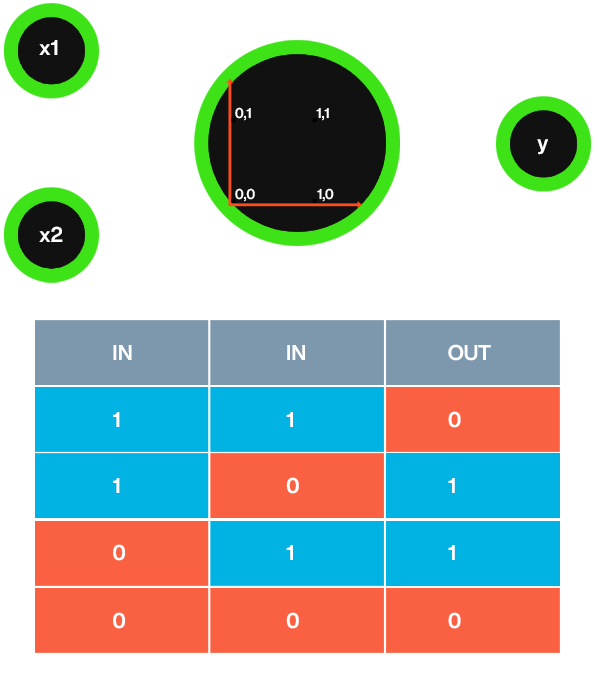

Yra būdų sukurti neuroninius tinklus, kurie galėtų išspręsti šią problemą. Sujungę <code>**AND, NOT, OR vienetus**</code> galime sukurti <code>**XOR loginį vienetą**</code>

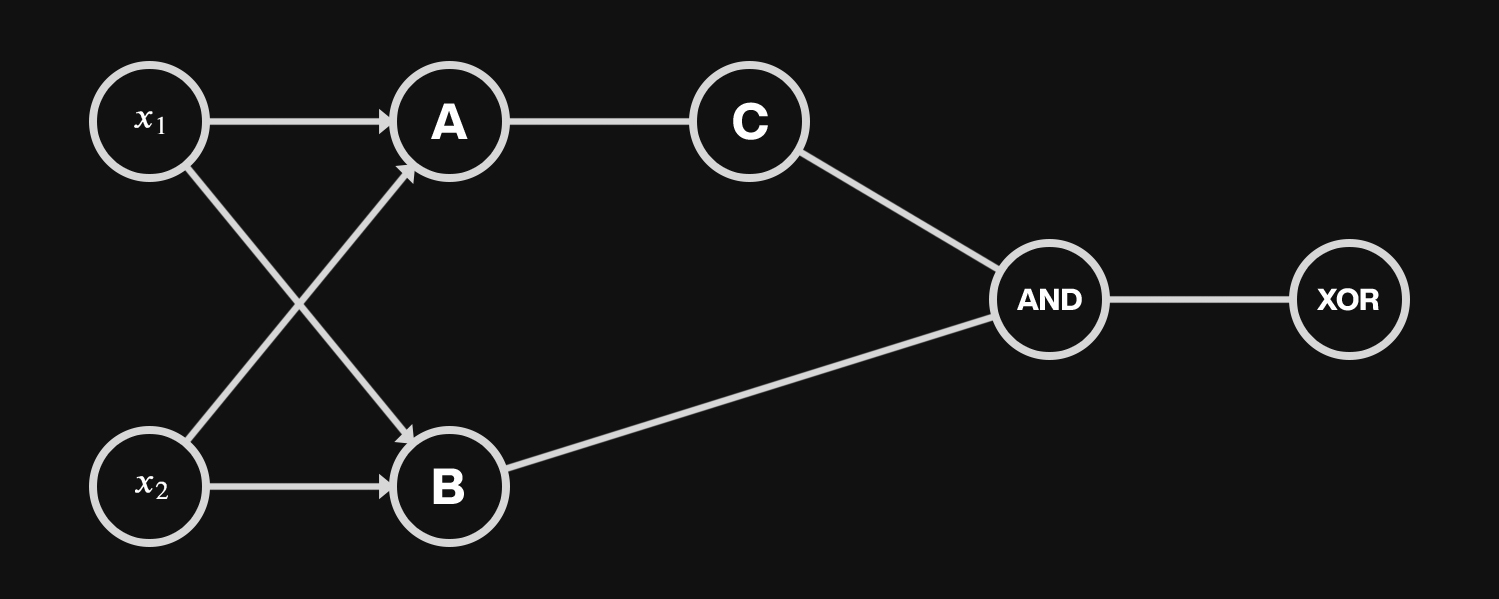

<div class="alert alert-block alert-success">
<h2>Klasės darbas</h2>
Šiame neuroniniame tinkle yra nežinomi 3 neuronai A, B ir C. Paskutinis jau nustatytas kaip AND loginis vienetas. Įvestis į neuroninį tinklą yra iš pirmojo mazgo. Išvestis išeina iš paskutinio mazgo AND. Čia pateiktas daugiasluoksnis perceptronas kuris turi būti XOR loginis operatorius . Kiekvienas nepažymėtas neuronas A, B ir C gali būti loginė AND, OR ir NOT operacija. Tolesnėje uždavininyje nustatykite teisingas šių A, B ir C loginių vienetų operacijas, kad apskaičiuotumėte XOR.
</div>

Naudodami savo logiką ir matematines žinias kurėme perceptronus kaip loginius operatorius. Tačiau realiame gyvenime mes negalime patys kurti šių perceptronų. Esmė yra ta, kad mes suteikiame jiems duomenys ir norimą rezultatą, o jie patys save kuria.

Kaip mus rasti šia liniją kuri atskirai šias dvi taškų aibes (mėlyni ir raudoni) geriausiai kaip tik gali? Mašina nežino kur pradėti todėl pradeda nuo atsitiktinio linijos modelio pasirinkimo, ši liniją apibrėžiai tarytum neigiama ir teigiama erdves. Turėsime įvertinti kaip blogai ar gerai ji atlieka savo uždavinį ir ją koreguoti kad gauti geresnį rezultatą. Klausimas kaip mums žinoti ar ji gerai daro savo darbą ? Kiek mes turime taškų kurie yra klasifikuojami gerai ir kurie blogai ? Mes norime iš jų gauti informacija kuris padės mums nustatyti geresnį modelį. Tai ka tie taškai mums sako ?  

## Perceptrono mokymosi taisyklė

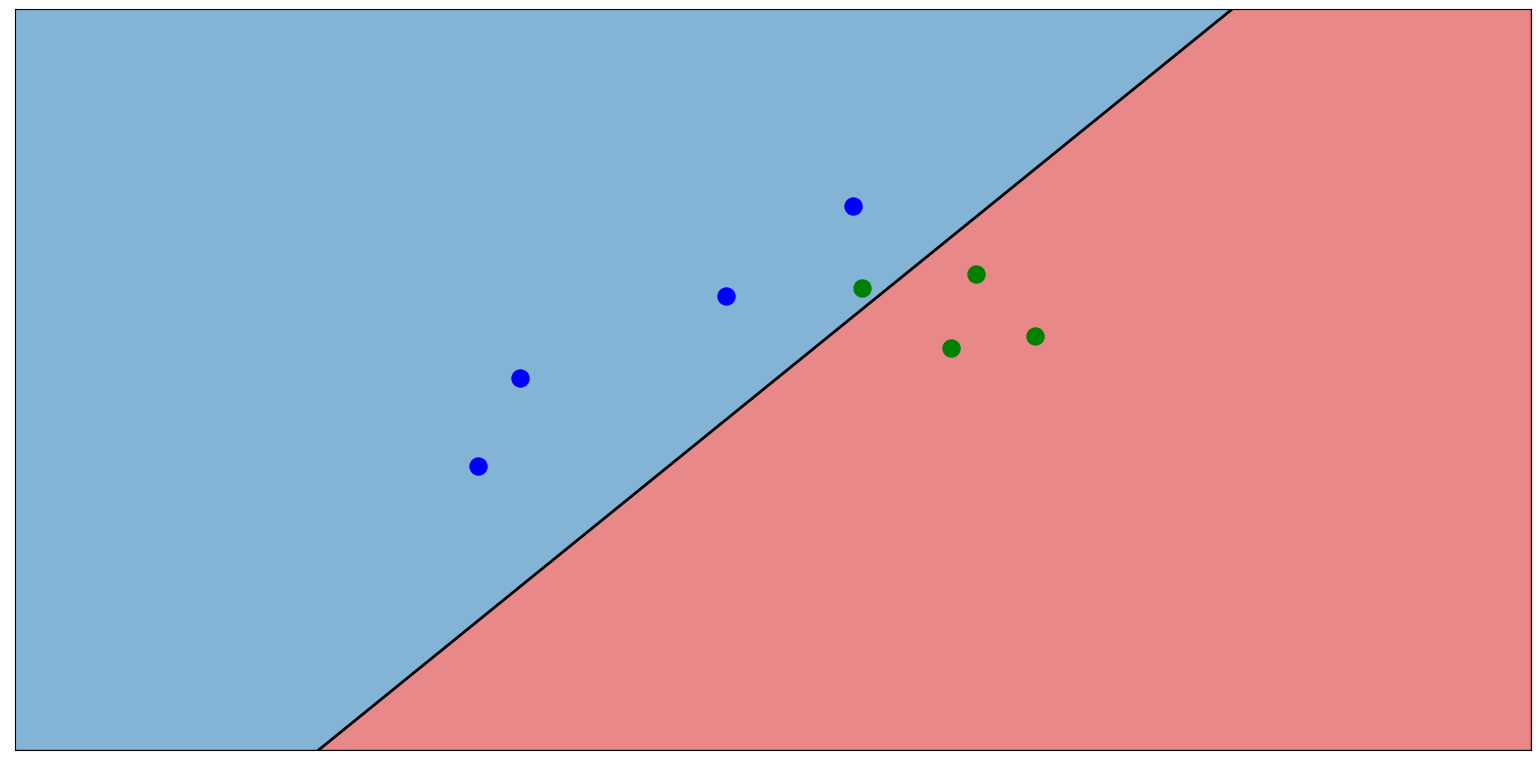

In [338]:
%run ../scripts/_nn_perceptron_a.py

Išskirkime vieną tašką kuris yra nuklasifikuotas blogai. Ir kas tas taškas sako linijai, kad ji priartėtų ir nutoltų ?
Kai taškai yra klaidingai klasifikuoti, taškai tarytum nori kad linija priartėtų prie jų taip pakeičiant linijos lygtį, kad ji priartėtų prie konkretaus to taško.

Isivaizduokite kad turime lygtį kuri yra linija.

\begin{multline*}
3x_{1} + 4x_{2} - 10 = 0
\end{multline*}

Ši lygtis sukuria du regionus (teigiama ir neigiama)<br>
<code>**Teigiamas regionas:**</code><br>

\begin{multline*}
3x_{1} + 4x_{2} - 10 > 0
\end{multline*}

<code>**Neigiamas regionas:**</code><br>

\begin{multline*}
3x_{1} + 4x_{2} - 10 < 0
\end{multline*}

Ir turime neteisingai nuklasifikuotą tašką kurio kordinatės yra <code>**(4,5)**</code>.  Ir šis taškas sako linijai kad ji turi priartėti prie jo. Kad tai padaryti paimsime kordinates 4 ir 5 ir panaudosime kad modfikiuoti linijos lygtį tai kad linija priartėtų prie šio taško.
Linija turi parametrus : 3, 4, -10, o taško kordinatės yra 4 ir 5 dar pridėsime poslinkio vieneta kuris bus lygus 1.
Dabar šiuos kordinačiu taškus atimsime iš parametrų ir gausime -1, -1, -11:

\begin{multline*}
3 \ \  \ \ \  \ \ \ 4 \ \ \  -10
\end{multline*}


\begin{multline*}
-
\end{multline*}

\begin{multline*}
4 \ \ \ \ \ \ \ \ 5 \ \ \ \ \ \ \ \  1
\end{multline*}

-----

\begin{multline*}
-1  \ -1  \ \  -11
\end{multline*}

Dabar linija drastiškai priartės prie taško ji peržengs ir nuklasifikuos šį taška teisingai. Bet mes turime ir kitų taškų kurie dėl tokio draštiško žingsnio gali būti nuklasifikuoti neteisingai. Kad išvengti šio drastiškio judesio, įtrauksime mokymosi žingsnis kuris yra mažas skaičius tarkime 0.1. Dabar vietoje to kad atimti kordinates 4, 5, 1 iš linijos koeficientų mes kordinatės skaičius dauginsime iš šio mažo mokymosi žingsnio, tada gausime:

\begin{multline*}
3 \ \  \ \ \  \ \ \ 4 \ \ \  -10
\end{multline*}


\begin{multline*}
-
\end{multline*}

\begin{multline*}
0.4 \ \  \ \ \ 0.5 \ \ \ \ \  0.1
\end{multline*}

-----

\begin{multline*}
2.6  \ \  \ \ \  3.5  \ \  -10.1
\end{multline*}

Tai reiškia ka mes atimsime 0.4, 0.5, 0.1 iš linijos lygties. Ir gausime naują linijos lygtį:

\begin{multline*}
2.6x_{1} + 3.5x_{2} - 10.1 = 0
\end{multline*}

Ir šį linija šiek tiek priartės prie mūsų taško.

Jeigu analizuoti atvejį kuomet situacija yra tokią kad taškas esantis negatyvioje erdvės pusėje yra netesingai nuklasifikuotas (turi būti teigiamos erdvės pusėje) <code>**tai procesas yra labai panašus tik vietoje atimties tarp tiesės funkcijos ir taško kordinačių reikės atlikti sudėties operacija.**</code> Štai tokia repetityvi operacija bus vykdomą apmokąnt perceptrono algoritmą.

<div class="alert alert-block alert-success">
<h2>Klasės darbas</h2>
Linija apibūdina ši funkcija 3x1+ 4x2 – 10 = 0, jei mokymosi žingsnis/greitis buvo nustatytas į 0.1, kiek kartų turėtumėte taikyti perceptrono mokymosi operaciją, kad linija būtų perkelta į teisingą vietą, taip kad teigiamas taškas esantis (1, 1), butų teisingai klasifikuojamas, kad taškas būtų teigiamoje funkcijos erdvėje?
</div>

### Perceptrono mokymosi pseudo algoritmas

TODO: padaryk animuotą illiustraciją su grafikais

1. Pradedama nuo atsitiktiniu svoriu: w1, ..., wn, b tai duoda mums tiesės lygtį wx + b ir teigiamas ir neigiamas šios tiesės funkcijos erdves.
2. Su kiekvienu  neteisingai nuklasifikuotu tašku kuris turi kordinates x1, ..., xn mes atliekame:
 - 2.1) spėjimas = 0, reiškiasi taškas yra teigiamas neigiamoje erdvėje todėl atnaujiame lygties svorius w taip:
   - for i = 1...n:
       - keičiame wi = wi + αxi
   - keičiame b poslinkio vienetą, b = b + α 
   
  - 2.2) spėjimas = 1, reiškiasi taškas yra neigiamas teigiamoje erdvėje todėl atnaujiname lygties svorius w taip:
    - for i = 1...n:
        - keičiame wi = wi - αxi
    - keičiame b poslinkio vienetą, b = b - α     
    
Šis procesas kartojamas kol nebėra klaidų arba jos yra mažos arba galima nustatyti kad šį operaciją būtų atlikta lygiai 100 ar 1000 kartų.

<div class="alert alert-block alert-success">
<h2>Klasės darbas</h2>
Programuosite perceptroną. Prisiminkite, kad perceptrono žingsnis veikia taip. Taškas turi koordinates (p,q) ir etikete y, y gali būti 1 arba 0. Perceptronas yra modelis kuris irgi generuoja 𝑦 , 
\begin{multline*}
    \hat{y} = \alpha(w_1x_1 + w2x + b)
\end{multline*}
    
- Jei taškas klasifikuotas teisingai, nieko nedarykite.
- Jei taškas klasifikuojamas kaip teigiamas, bet turi neigiamą etiketę, atimkite 𝛼p, 𝛼q ir 𝛼 iš w1, w2, b
- Jei taškas klasifikuojamas neigiamai, bet turi teigiamą etiketę, pridėkite𝛼p, 𝛼q ir 𝛼 iš b w1, w2, b
    
    
</div>

In [466]:
import warnings
warnings.filterwarnings('ignore')

In [467]:
import numpy as np
import pandas as pd

In [468]:
data = np.genfromtxt('../data_samples/perceptron_data_a.csv', delimiter=',')

In [469]:
X = data[:, :2]

In [471]:
X.shape

(100, 2)

In [472]:
y = data[:, 2]

In [473]:
y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [474]:
def step(t):
    if t >= 0:
        return 1
    return 0

def prediction(X, W, b):
    return step((np.dot(X,W)+b)[0])

<div class="alert alert-block alert-success">
<h2>Jūsų užduotis</h2>
    
Turite sukurti šią funkciją `perceptron_step()` kuri taikys perceptrono mokymosi algoritmą. Funkcija kaip įvestį turėtų gauti šiuos argumentus:
 - duomenis X ir etiketes y
 - svorius W (kaip np masyvas) ir poslinkį b,
 - turi atnaujinti svorius ir poslinkius W, b pagal perceptrono algoritmą
 - gražinti W ir b

In [414]:
def perceptron_step(X, y, W, b, learn_rate = 0.01):
    # TODO programuoti čia
    return W, b

Ši funkcija skirta grafiko braižybai. Pati funkcija pakartotinai kveičia `perceptron_step()` perceptrono algoritmą naudoama duomenų rinkinį ir grąžina keletą ribinių sprendimo linijų, gautų atliekant iteracijas. Išmėginkite keletą mokymosi žingsniu/greičiu ir epochų/iteracijų skaičių

In [445]:
boundaries, W, b = train_perceptron(X,y)

In [418]:
def train_perceptron(X, y, learn_rate = 0.01, num_epochs = 25):
    x_min, x_max = min(X.T[0]), max(X.T[0])
    y_min, y_max = min(X.T[1]), max(X.T[1])
    W = np.array(np.random.rand(2,1))
    b = np.random.rand(1)[0] + x_max
    boundary_lines = []
    for i in range(num_epochs):
        W, b = perceptron_step(X, y, W, b, learn_rate)
        boundary_lines.append((-W[0]/W[1], -b/W[1]))
    return boundary_lines, W, b

In [475]:
def plot(X, y, W, b):
    x1, x2 = X[:,0], X[:,1]
    plt.figure(figsize=(7,7))
    a = -W[0] / W[1]
    xx = np.linspace(0, 1)
    yy = a * xx - (b) / W[1]
    plt.scatter(x1, x2, c=y, s=70, edgecolor='black', alpha=0.7, )
    plt.plot(xx, yy, c='black', linewidth=2)
    plt.grid(True)
    plt.tight_layout()

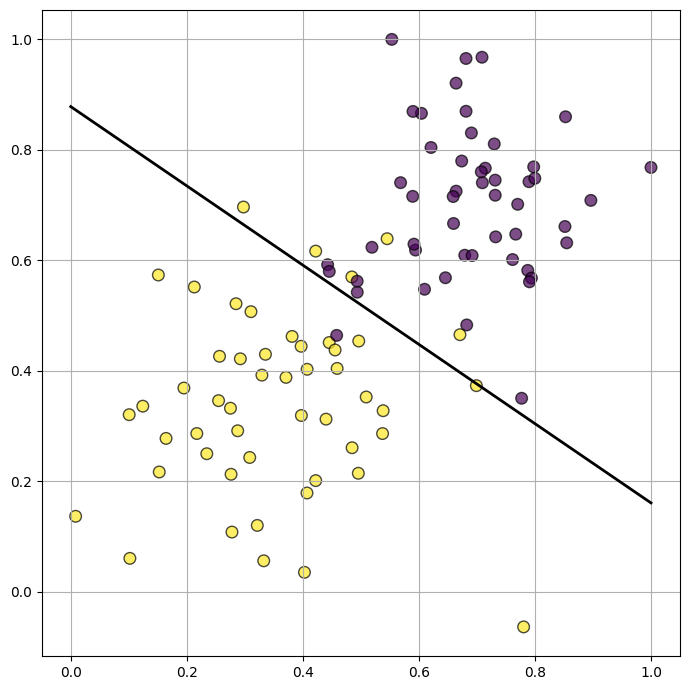

In [444]:
plot(X,y,W,b)

<code>**Jus sėkmingai suprogromavote savo pirmajį perceptroną. Su tuo Jus ir sveikinu, ir Frank Rosenblatt'as taip pat sveikina.**</code>

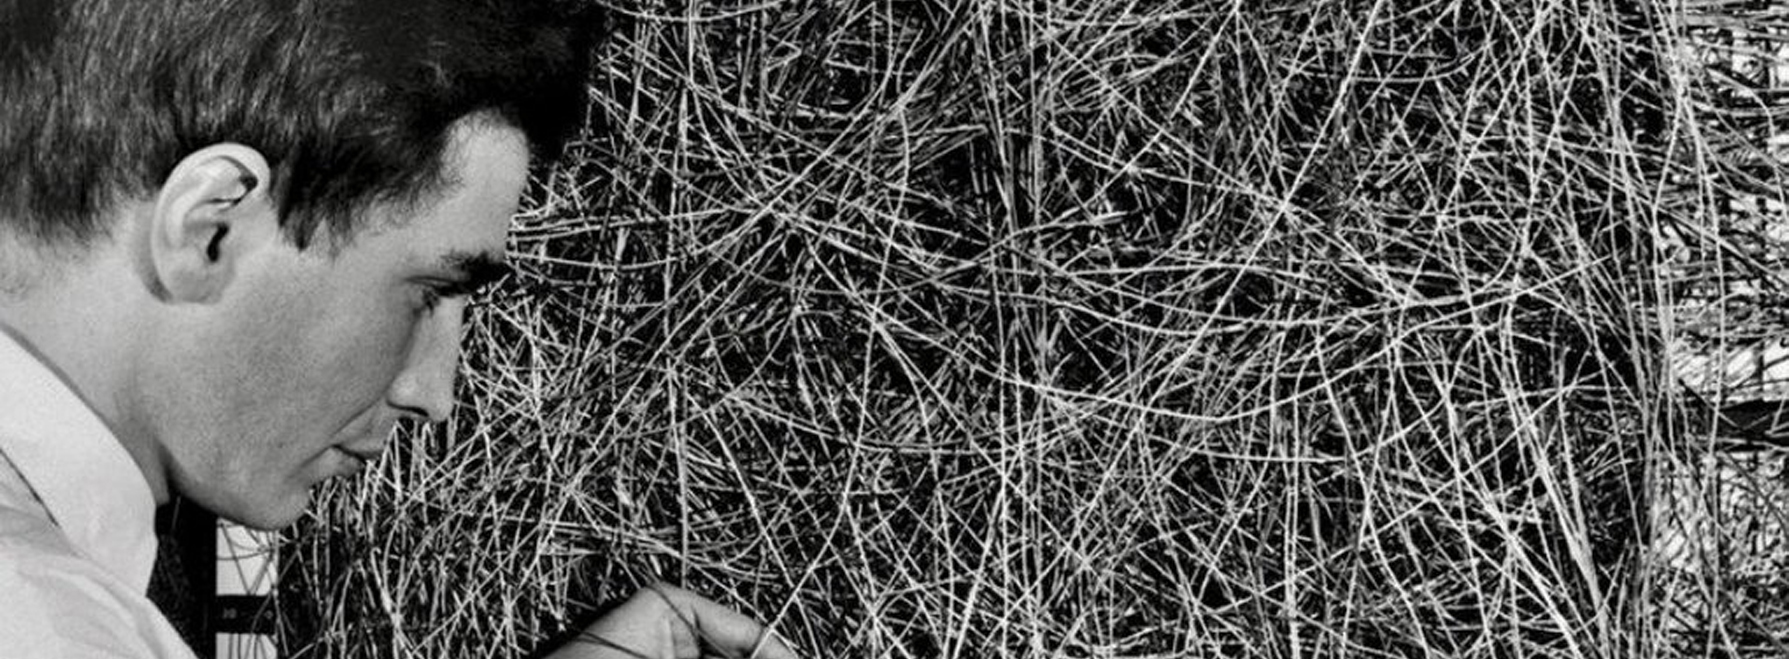

Perceptronas yra mokymosi taisyklė reprezentatyviam matematiniam neurono modeliui. Tai mums duoda autmatišką būdą kaip pagalba rasti svorio parametrus kad tarkime galėtume išspręsti klasifikacijos problemą. Mes galime patys ir rankiniu budu taikyti OR ir AND, NOT loginius operatorius naudodami specifinius svorius ir slenksčius bet su perceptronu šiuos svorius randame automatiniu budu skirtingoms klasifikavimo problemoms. 1957 metais perceptronas buvo apartinė įranga ir Frankas Rosenblatt turėjo daug reikalų su perceptrono kabeliais.  

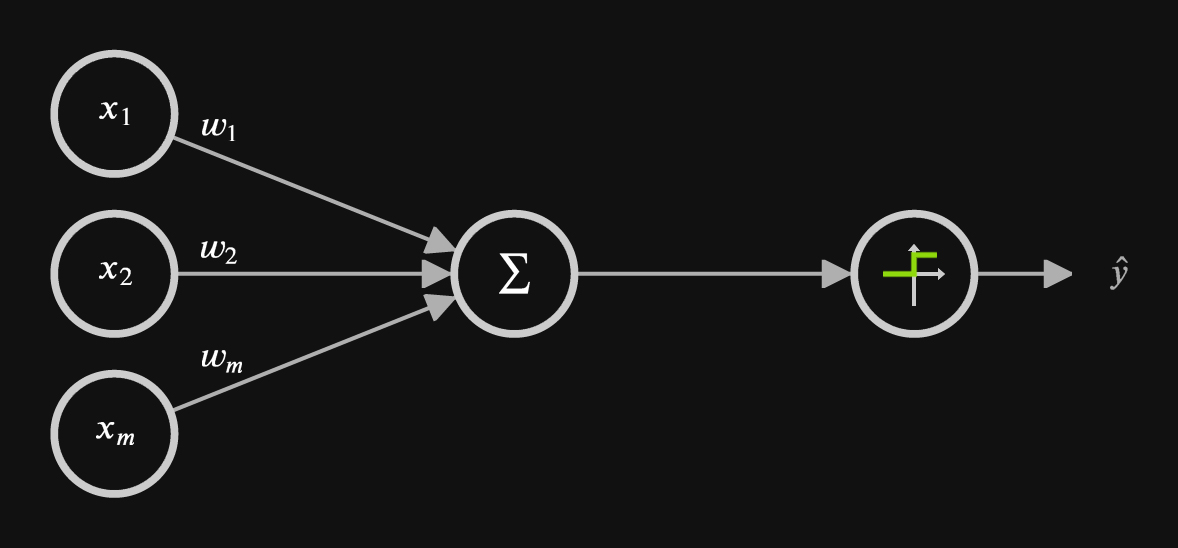

\begin{multline*}
z = (\sum^{m}_{i=1} x_{i}w_{i})
\end{multline*}

\begin{multline*}
f(z) = 
\begin{array}{rcl}
0, & z - \theta  \leq  0\\ 
1, & z - \theta > 0
\end{array}
\end{multline*}

\begin{multline*}
f(z) =\hat{y}
\end{multline*}

Mokymosi taisyklė yra panaudojama nustatyti tinkamoms w reikšmėms kad galėtume išspręsti skirtingas klasifikacijos problemas. Tarkime vildagių klasifikavimas. Tačiau yra vienas trukumas su perceptronu, vikdagių duomenų rinkinys turi tris klases o perceptronas sprendžia binarinės klasifikacijos problemas. Todėl jei norime naudoti perceptrona su vilkdagių duomenų rinkiniu mums reikės suspaprastinti rinkį kad būtų tik dvi gėlių klasės/kategorijos. 

\begin{multline*}
f_{\theta} = (\sum^{m}_{i=1} x_{i}w_{i})
\end{multline*}

<code>**Slegstis**</code>

\begin{multline*}
\theta
\end{multline*}

<code>**Modelio numatoma klasės etiketė**</code>

\begin{multline*}
\hat{y}
\end{multline*}

### Terminologija

Bendrinė logistinei, tiesinei regresijai, daugiasluoksniams tinklams ir t.t 

 - <code>**Bendrinė įvestis (net input), z**</code> - Tai matematinė lygtis apibrėžianti bendrą signalų <code>**x**</code>, kuris ateina į mazgą iš kitų tinklo vienetų sandaugos su svoriais <code>**w**</code> sumą.
 
\begin{multline*}
z = \sum^{m}_{i=1} x_{i}w_{i}
\end{multline*}

 - <code>**Aktivacijos (activations), a**</code> - aktivacijos funkcija kuri prima ir apdoroja bendrinę įvestį.
 
\begin{multline*}
a = \sigma(z)
\end{multline*}

 - <code>**Etiketės išvestis (label output), 𝑦̂**</code> išvestis sukuriama kai pritaikome slengstį tinklo paskutinių sluoksnių aktivacijoms.  
 
\begin{multline*}
\hat{y} = f(\sigma(z)) 
\end{multline*}

Kai kurios išimtys:

- Perceptrone aktivacijos funkcija yra slenksčio funkcija, kažkuria prasme perceptronas neturi aktivacijos funkcijos.
- Tiesinėje regresijos aktivacija yra lygi bendrinei įvesčiai ir šioji yra lygi išvesčiai

## Vieno sluoksnio neuroninių tinklų bendrinė notacija

\begin{multline*}
\sigma \ \ ( \sum^{m}_{i=1} x_{i}w_{i} + b ) = \sigma(x^{\top}w +b ) = \hat{y}
\end{multline*}

\begin{multline*}
f = \sigma
\end{multline*}

\begin{multline*}
f \ (z) =
\begin{array}{rcl}
0, z \leq 0 \\
1, z > 0
\end{array}
\end{multline*}

\begin{multline*}
b = - \theta
\end{multline*}

Bendrinė įvestis turi pridėta taposlinkio reikšmę sumoje. 

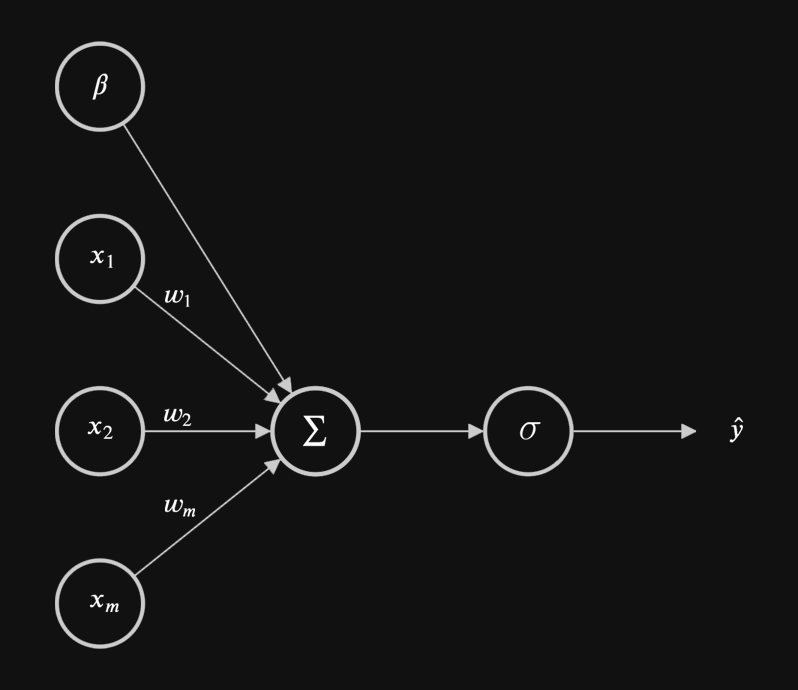

Tai šiek tiek skiriasi nuo to ka mes darėme prieš tai daugiamatėje tiesinėje ir logistinėje regresijoje.

\begin{multline*}
\sigma \ \ ( \sum^{m}_{i=0} x_{i}w_{i} ) = \sigma(x^{\top}w) = \hat{y}
\end{multline*}

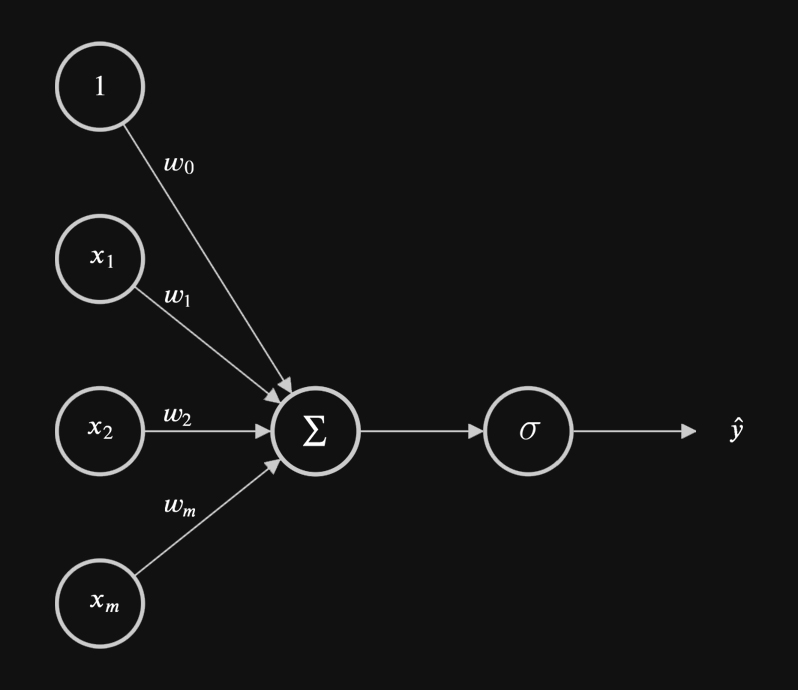

Su didelėmis savybių erdvėmis tai sukelia skaičiavimo efektyvumo problemas.
Mūsų savybių vektorius:<br>

\begin{multline*}
\vec{x}^{(1)} = 
\begin{bmatrix}
x1, & x2, & x3, & x4, & xn
\end{bmatrix}
\end{multline*}

Reikia atlikti šio vektoriaus modofikacija į:<br>


\begin{multline*}
\vec{x}^{(1)} = 
\begin{bmatrix}
1, & x1, & x2, & x3, & x4, & xn
\end{bmatrix}
\end{multline*}

Praktikoje yra fiksuoto dydžio masyvai ir norėdami atlikti tokią modifikacija kompiuteris sukurs naują masyvą kuris bus šiek tiek didesnis ir tada visus narius turės pastumti, perindeksuoti. Ir tai yra brangi operacija. Daug paprasčiau tokiom aplinkybėmis yra tiesiog pridėti 𝑏.

\begin{multline*}
\vec{x}^{\top}\vec{w} + b
\end{multline*}

 - <code>**Jei teisinga:**</code> Nieko nedarykite, jei prognozė yra lygi etiketei
 
     \begin{multline*}
         \begin{array}{left}
         \hat{y} = y  \\
         \hat{y}= 1  \ \text{&} \ y = 1 \\ 
         \hat{y}= 0  \ \text{&} \ y = 0
         \end{array}
     \end{multline*}
     
 - <code>**Jei neteisingai, scenarijus a):**</code>: Jei išvestis yra 0, o tikslas yra 1, `pridėti` įvesties vektorių prie svorio vektoriaus 
 - <code>**Jei neteisingai, scenarijus b):**</code>: Jei išvestis yra 1, o tikslas yra 0, `atimti` įvesties vektorių iš svorio vektoriaus 

Garantuojama, kad konverguos (anskčiau ar vėliau), jei tiesinis sprendimas egzistuoja. Jei nėra tokio sprendimo, tarkime jei turėtume mėlyną tašką tarp oranžinių taškų, nebūtų teisingos sprendimo ribos, pagal kurią būtų galima nepriekaištingai klasifikuoti šį duomenų rinkinį. Perceptrono sprendimo riba judėtų pirmyn ir atgal kartais sprendimo ribą apsiverstu.

 - <code>**1.**</code> Inicijuojame w:= 0^m <code>**(naudokite žymėjimą, kai poslinkis integruotas į svorius)**</code>
 - <code>**2.**</code> Kiekvienai epochai/iteracijai:
   - <code>**A.**</code> Kiekvienam \begin{multline*}\langle x^{[i]}, y^{[i]}\rangle \in \mathbf{D} :\end{multline*}
     - \begin{multline*} \hat{y} := \sigma(\mathbf{x^{[i]}}^{\top} \mathbf{w}) \end{multline*}
     - \begin{multline*} \text{err} := (y^{[i]} - \hat{y}^{[i]}) \end{multline*}
     - \begin{multline*} \mathbf{w} := \mathbf{w}  + \text{err} \times \mathbf{x}^{[i]} \end{multline*}

Epochos reiškia iteracija arba praėjimas pro visą duomenų rinkinį ir bus apdorotas pagal algoritmą kiekvienas duomenų rinkinio įrašas(taškas)<code>**Pirma epocha praeis pro visus taškus iki galo, tada sekantį epocha vėl darys tą patį.**</code>
<br>
Tada yra vidinis ciklas kiekviena duomenų įrašui iš rinkinio, kuris atlieka a,b,c žingsnius.
Jei yra daug epochų tai ir šie žignsiai bus darome daug kartų.<code>**Perceptronas vienu metu adoroja tik po viena duomenų pavyzdį/irašą**</code> a) Jis apskaičiuoja prognozę kaip grynąją įvesties sumą. 2) Apskaičiuoja klaidą , apskaičiuoja iš tikrosios etiketės atėmus etiketę. Tarkime paprastą atvejį, kai neturime jokios klaidos y^[i] - y_hat^[i]  yra 0 tada klaida yra 0. c) Svorio atnaujinimas vyksta atsižvelgiant į seną svorį plius paklaida, padauginta iš įvesties vektoriaus. Bet klaida yra 0, tada atšaukiame įvesties vektoriaus reikšmes ir iš esmė nėra jokio atnaujinimo.
<br>

\begin{multline*}
\mathbf{w} := \mathbf{w}  + \text{err}\hspace-2.2ex\diagup * x^{[i]} \hspace-2.2ex\diagup
\end{multline*}

Ir jei abu (tikroji etiketė ir prognozė) yra 1, taip pat galime atšaukti svorio atnaujinimą. Taigi svorio atnaujinimas gali įvykti tik tada, kai yra klaida. Apsvarstykime atvejį, kai tikroji etiketės žymą yra  1, o prognozę – 0, tada klaida yra 1. Tada <code>**pridedame įvesties vektorių**</code>. Jei pakeičiame scenarijų kai tikroji etiketė 0 o prognozė yra 1, tada gauname klaidą = -1. Šiuo atveju<code>**atimame įvesties vektorių iš svorio**</code>

## Taikymas

<code>**Numpy**</code>

In [479]:
import warnings
warnings.filterwarnings('ignore')

In [480]:
import numpy as np

In [495]:
data = np.genfromtxt('../data_samples/perceptron_data.txt', delimiter='\t')
X, y = data[:, :2], data[:, 2].astype(np.int)

In [498]:
print('label counts: ', np.bincount(y))
print('X forma: ', X.shape)
print('y forma: ', y.shape)

label counts:  [50 50]
X forma:  (100, 2)
y forma:  (100,)


<code>**Modelio treniravimo ir testavimo duomenys**</code>

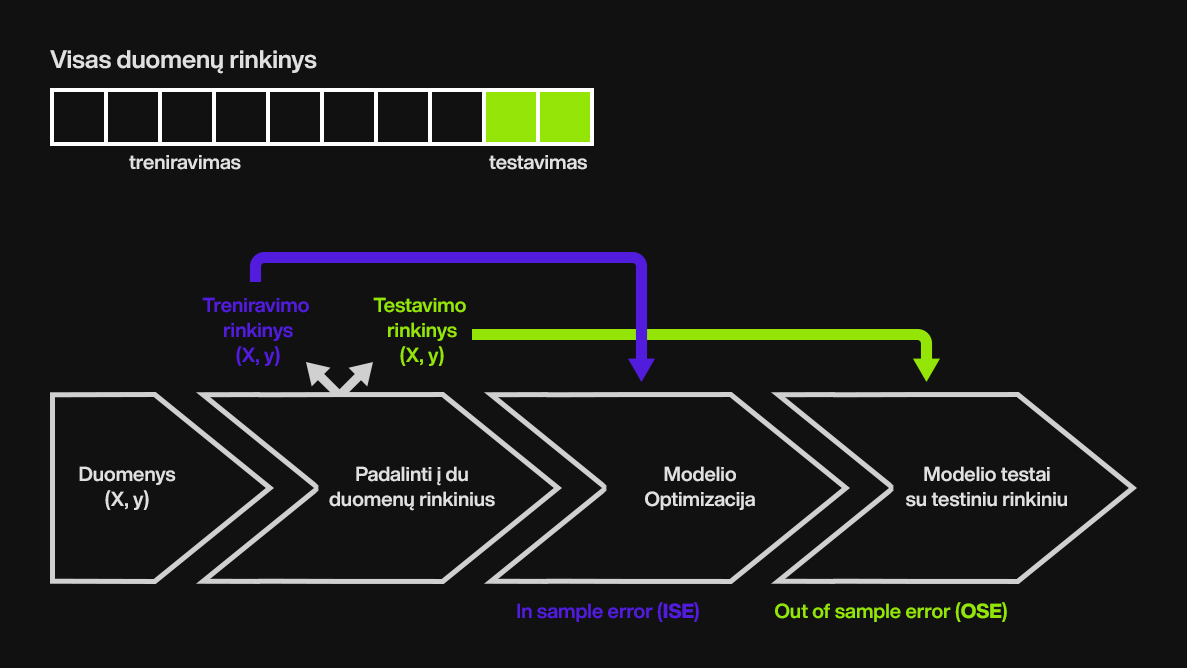

In [502]:
def train_test_split(X, y):
    shuffle_idx = np.arange(y.shape[0])
    shuffle_rng = np.random.RandomState(123)
    shuffle_rng.shuffle(shuffle_idx)
    X =  X[shuffle_idx]
    y =  y[shuffle_idx]

    X_train, X_test = X[:70], X[70:]
    y_train, y_test = y[:70], y[70:]
    
    return X_train, X_test, y_train, y_test

In [503]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [507]:
print('X_train forma: ', X_train.shape)
print('y_train forma: ', y_train.shape)
print('X_test  forma: ',  X_test.shape)
print('y_test  forma: ',  y_test.shape)

X_train forma:  (70, 2)
y_train forma:  (70,)
X_test  forma:  (30, 2)
y_test  forma:  (30,)


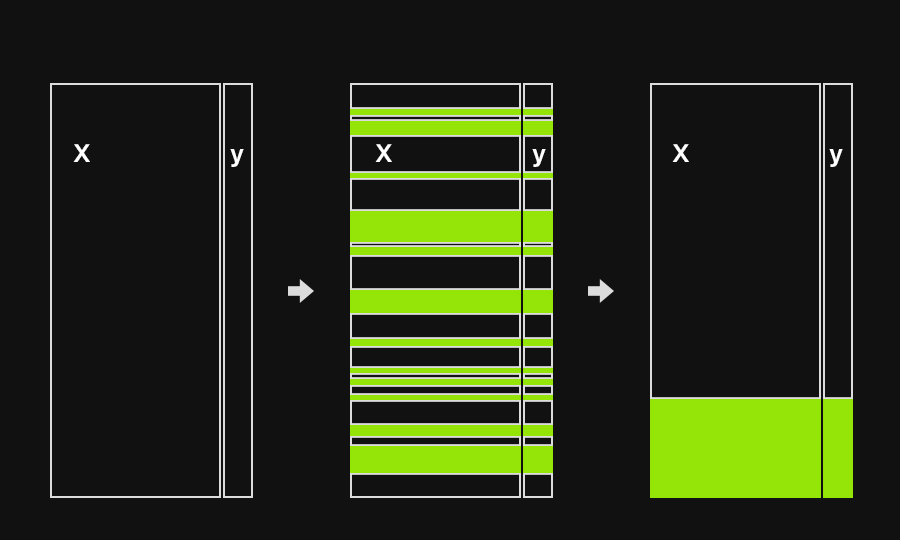

\begin{multline*}
x_{i} \leftarrow \dfrac{x_{i}- \mu_{i}}{s_{i}}
\end{multline*}

In [508]:
def normalize(X):
    mu, sigma = X.mean(axis=0), X.std(axis=0)
    return (X - mu) / sigma

In [509]:
X_train_N = normalize(X_train)
X_test_N  = normalize(X_test)

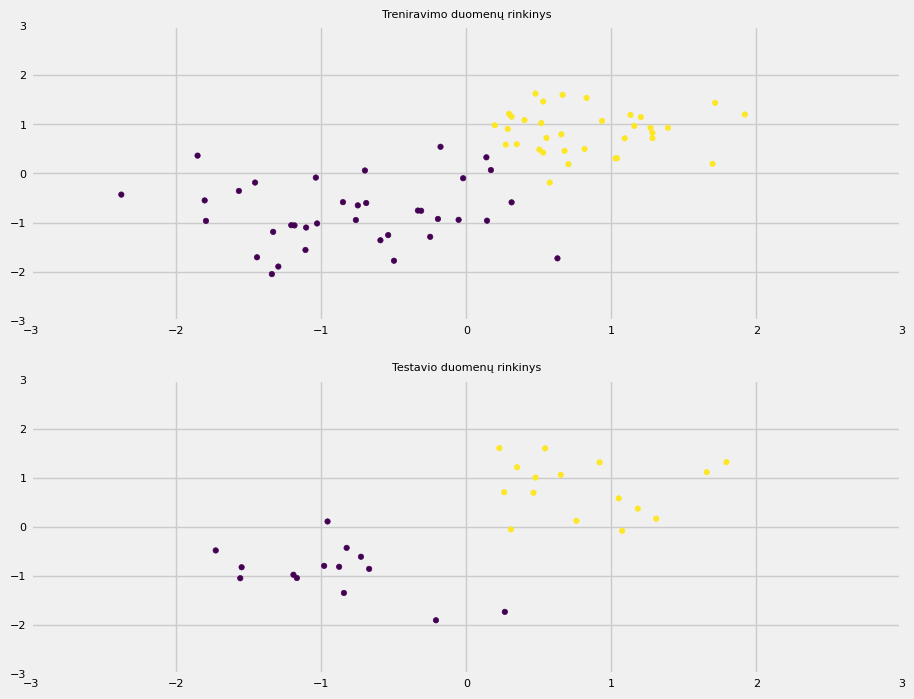

In [550]:

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10,8))
ax1.scatter(X_train_N[:,0], X_train_N[:,1], c=y_train , s=15, marker='o')
ax2.scatter(X_test_N[:,0], X_test_N[:,1], c=y_test , s=15, marker='o')

ax1.set_title('Treniravimo duomenų rinkinys', fontsize=8)
ax2.set_title('Testavio duomenų rinkinys', fontsize=8)

ax2.tick_params(axis='both', which='major', labelsize=8)
ax2.tick_params(axis='both', which='minor', labelsize=8)
ax1.tick_params(axis='both', which='major', labelsize=8)
ax1.tick_params(axis='both', which='minor', labelsize=8)

ax1.set_xlim([-3, 3]);
ax1.set_ylim([-3, 3]);
ax2.set_xlim([-3, 3]);
ax2.set_ylim([-3, 3]);

In [558]:
class Perceptron():
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights      = np.zeros((num_features, 1), dtype=np.float)
        self.bias         = np.zeros(1, dtype=np.float)
        
    def forward(self, x):
        linear = np.dot(x, self.weights) + self.bias
        y_hat  = np.where(linear > 0., 1, 0)
        return y_hat
    
    def backward(self, x, y):
        y_hat = self.forward(x)
        error = y - y_hat
        return error
    
    def train(self, x, y, epochs):
        for e in range(epochs):
            for i in range(y.shape[0]):
                error = self.backward(x[i].reshape(1, self.num_features), y[i]).reshape(-1)
                
                self.weights += (error * x[i]).reshape(self.num_features, 1)
                self.bias    += error
                
    def evaluate(self, x, y):
        y_hat = self.forward(x).reshape(-1)
        acc   = np.sum(y_hat == y) / y.shape[0]
        return acc

In [559]:
percept = Perceptron(num_features=2)

In [560]:
percept.train(X_train, y_train, epochs=5)

In [564]:
train_acc = percept.evaluate(X_train, y_train)
test_acc  = percept.evaluate(X_test, y_test)
print(f'tikslumas su treniravimo duomenimis: {train_acc*100} %')
print(f'tikslumas su testiniais duomenimis: {test_acc*100} %')


tikslumas su treniravimo duomenimis: 100.0 %
tikslumas su testiniais duomenimis: 100.0 %


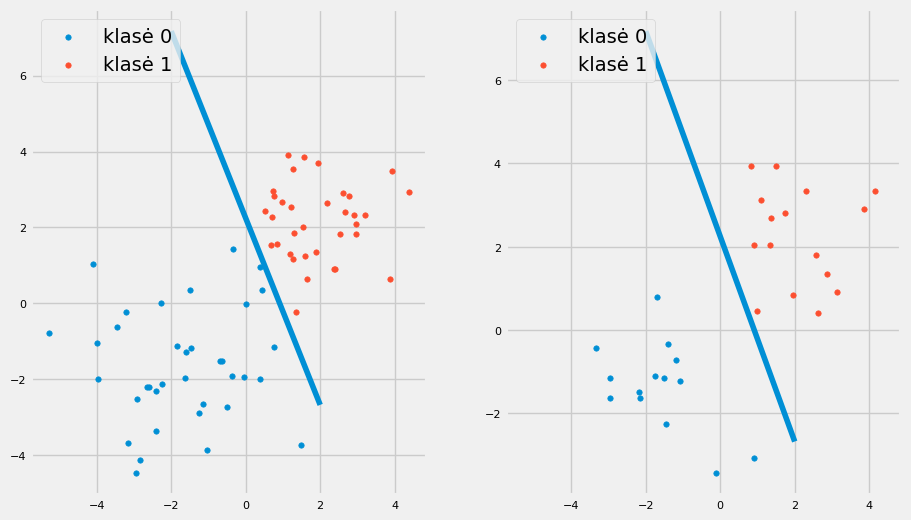

In [576]:
w, b = percept.weights, percept.bias

x0_min = -2
x1_min = ( (-(w[0] * x0_min) - b[0]) 
          / w[1] )

x0_max = 2
x1_max = ( (-(w[0] * x0_max) - b[0]) 
          / w[1] )

# x0*w0 + x1*w1 + b = 0
# x1  = (-x0*w0 - b) / w1

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=True,figsize=(10,6))

ax1.plot([x0_min, x0_max], [x1_min, x1_max])
ax1.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], label='klasė 0', s=15, marker='o')
ax1.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], label='klasė 1', s=15, marker='o')

ax2.plot([x0_min, x0_max], [x1_min, x1_max])
ax2.scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], label='klasė 0', s=15, marker='o')
ax2.scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], label='klasė 1', s=15, marker='o')

ax2.tick_params(axis='both', which='major', labelsize=8)
ax2.tick_params(axis='both', which='minor', labelsize=8)
ax1.tick_params(axis='both', which='major', labelsize=8)
ax1.tick_params(axis='both', which='minor', labelsize=8)

ax1.legend(loc='upper left')
ax2.legend(loc='upper left');

<code>**Pytorch**</code>

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

class Perceptron():
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights      = torch.zeros(num_features, 1, dtype=torch.float32, device=device)
        self.bias         = torch.zeros(1, dtype=torch.float32, device=device)
        self.ones         = torch.ones(1)
        self.zeros        = torch.zeros(1)

    def forward(self, x):
        linear      = torch.mm(x, self.weights) + self.bias
        predictions = torch.where(linear > 0., self.ones, self.zeros)
        return predictions
        
    def backward(self, x, y):  
        predictions = self.forward(x)
        errors      = y - predictions
        return errors
        
    def train(self, x, y, epochs):
        for e in range(epochs):
            for i in range(y.shape[0]):
                errors = self.backward(x[i].reshape(1, self.num_features), y[i]).reshape(-1)
                self.weights += (errors * x[i]).reshape(self.num_features, 1)
                self.bias    += errors
                
    def evaluate(self, x, y):
        predictions = self.forward(x).reshape(-1)
        accuracy    = torch.sum(predictions == y).float() / y.shape[0]
        return accuracy

In [ ]:
ppn = Perceptron(num_features=2)

X_train_tensor = torch.tensor(X_train_N, dtype=torch.float32, device=device)
y_train_tensor = torch.tensor(y_train,   dtype=torch.float32, device=device)

ppn.train(X_train_tensor, y_train_tensor, epochs=5)

print('Modelio parametrai:')
print('Svoriai: %s' % ppn.weights)
print('Poslinkis: %s' % ppn.bias)

In [ ]:
X_test_tensor = torch.tensor(X_test_N, dtype=torch.float32, device=device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32, device=device)

test_acc = ppn.evaluate(X_test_tensor, y_test_tensor)
print('Test set accuracy: %.2f%%' % (test_acc*100))

In [ ]:
w, b = ppn.weights, ppn.bias

x0_min = -2
x0_max = 2
x1_min = ((-(w[0] * x0_min) - b[0]) / w[1])
x1_max = ((-(w[0] * x0_max) - b[0]) / w[1])

# x0*w0 + x1*w0 + b = 0
# x1*w1 = (-x0*w0 - b) / w1

fig, ax = plt.subplots(1, 2, sharex=True, figsize=(7, 3))

ax[0].plot([x0_min, x0_max], [x1_min, x1_max])
ax[1].plot([x0_min, x0_max], [x1_min, x1_max])

ax[0].scatter(X_train_N.loc[X_train_N.index[(y_train==0)], 'X1'],
              X_train_N.loc[X_train_N.index[(y_train==0)], 'X2'], 
              label='class 0', 
              marker='o'
             )

ax[0].scatter(X_train_N.loc[X_train_N.index[(y_train==1)], 'X1'],
              X_train_N.loc[X_train_N.index[(y_train==1)], 'X2'],
              label='class 1', 
              marker='s'
             )

ax[1].scatter(X_test_N.loc[X_test_N.index[(y_train==0)], 'X1'],
              X_test_N.loc[X_test_N.index[(y_train==0)], 'X2'], 
              label='class 0', 
              marker='o'
             )
ax[1].scatter(X_test_N.loc[X_test_N.index[(y_train==1)], 'X1'],
              X_test_N.loc[X_test_N.index[(y_train==1)], 'X2'],
              label='class 1', 
              marker='s')

ax[1].legend(loc='upper left')
plt.show()

## Diskreti ir testinė reikšmė

Modelio prognozės iš esmės yra atsakymai kuriuos mes gauname iš algoritmo. Tai gali būti diskretus atsakymas kuris reiškia - 0 arba 1, taip ar ne. Kai tuo tarpu testinė reiškmė bus skaičius kaip tarkime 52 %, paprastai skaičius tarp 0 ir 1 ką mes laikysime tikimybę.
Žemiau turime du grafikus su taškais , mėlyni reiškia kad studentas išlaikė egzaminą o raudonas ne. Diskretus algoritmas mums pasakys tik tai ar studentas išlaikė ar ne, o algoritmas kurio atsakymai yra testinės reikšmės veiks taip, - kuo taškas yra toliau nuo ribinės sprendimo ribos tuo drastiškesnės šios tikimybės yra. Taškai kurie yra mėlynoje zonoje turi aukštas tikimybes kad priklauso mėlynai zonai, kai tuo tarpu tie kurie yra raudonoje zonoje turi mažas tikimybes kad priklauso mėlynai zonai. Kaip matote tikimybės yra atstumo nuo sprendimo ribos funkcijos

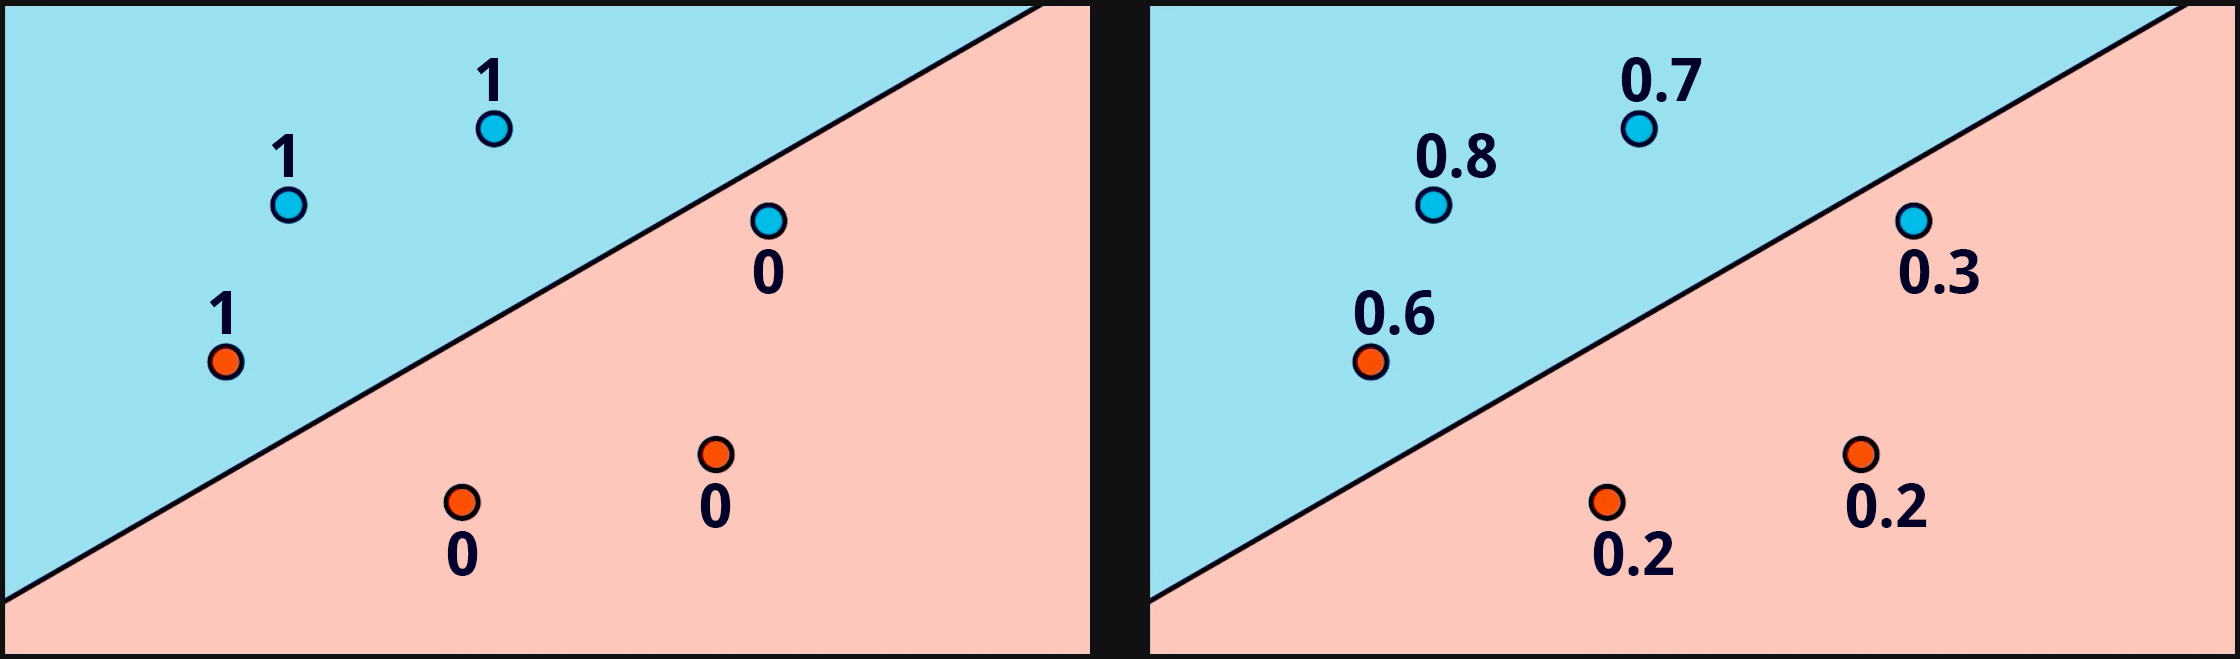

Kad pereiti nuo diskrečių prie testinių reikšmių reikia pakeisti aktivacijos funkcija nuo žingsninės/slengstinės į sigmoidinę funkciją. 

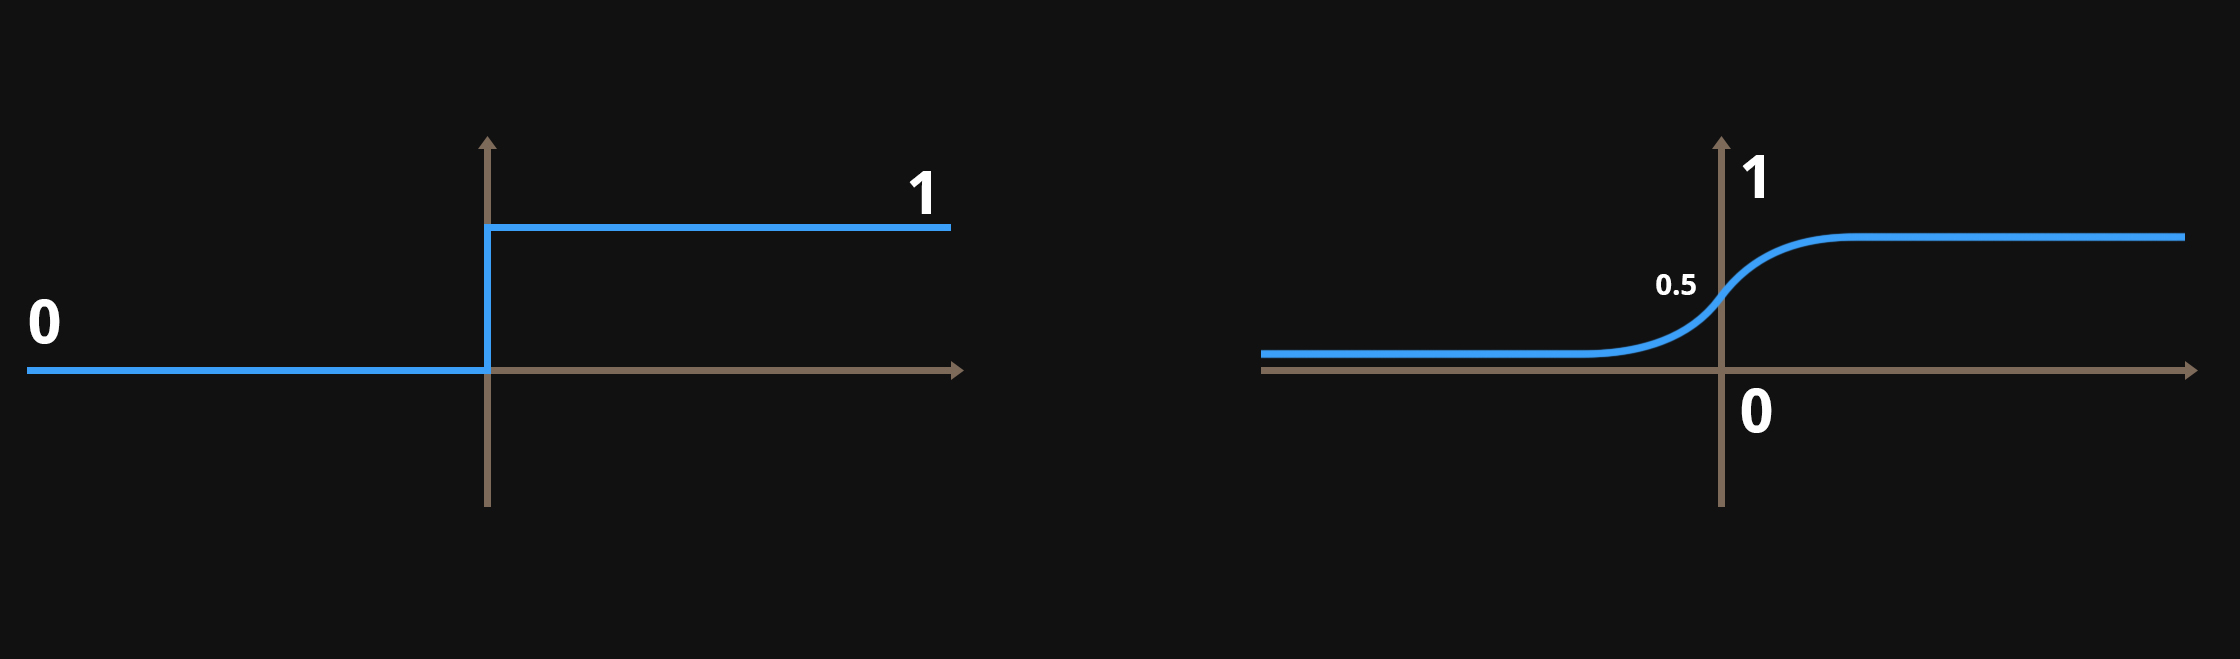

1.
\begin{multline*}
\hat{y} = 
\begin{Bmatrix}
 1, & x \geq 0 \\ 
 0, & x < 0
\end{Bmatrix}
\end{multline*}

2.
\begin{multline*}
\hat{y} =  \sigma(z) = \dfrac{1}{1 + e^{-z}}
\end{multline*}


Mūsų modelis linija kuri turi dvi puserdves,  neigiama ir teigiama regioną. Dabar tai yra visa tikimybės erdvė ir kiekvienas taškas šioje plokštumoje turi tikimybę, tarkime taškas kurio etiketę (y) yra teigiama (mėlyna) turi tikimybę 1, o raudoni tikymybe 0. Pvz.

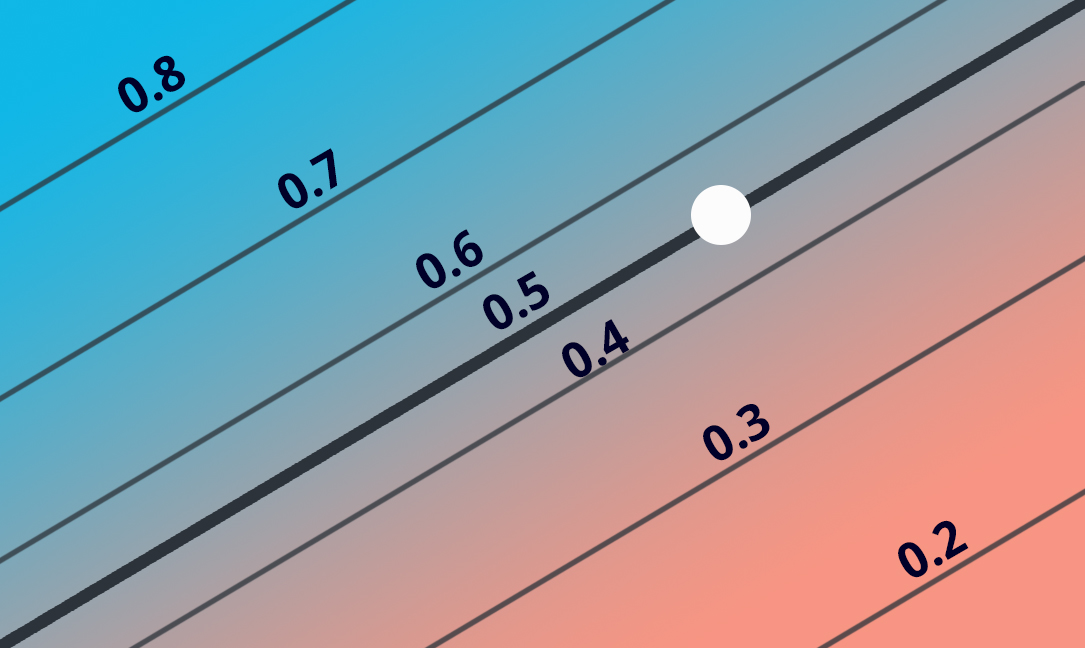

Kad gauti šią tikimybės erdvę mes sukombinuojame tiesinę funkcija Wx + b su sigmoidine funkcija.

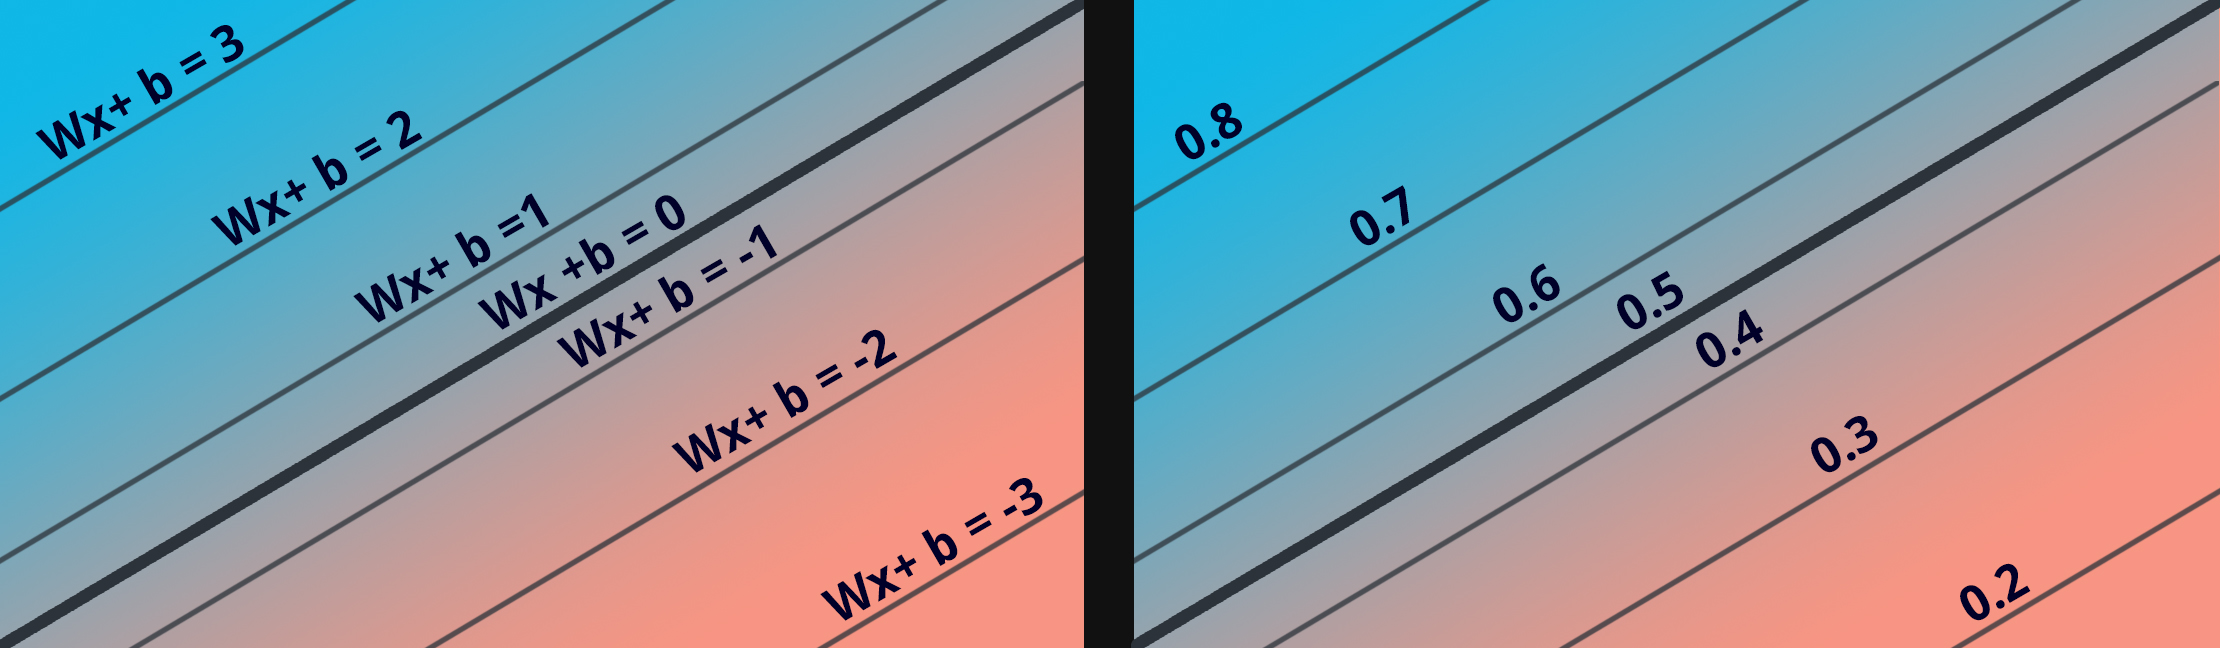

\begin{multline*}
\hat{y} = Wx +b
\end{multline*}

\begin{multline*}
\hat{y} =  \sigma(Wx+b) = \dfrac{1}{1 + e^{-Wx+b}}
\end{multline*}

<div class="alert alert-block alert-success">
<h2>Užduotis</h2>
    
 1. Jeigu 4x1 + 5x2 - 9 = y, tada kuris iš šių taškų turi lygiai 50 % tikimybę, kad bus mėlynas arba raudonas? (Pasirinkite visus teisingus.)
 - ( 1, 1)
 - ( 2, 4)
 - ( 5,-5)
 - (-4, 5)

 2. Kokia funkcija bet kokį skaičių paverčia pozityviu ?
 - sin
 - cos
 - log
 - exp
    
</div>